# **AIML Module Project - Featurisation & Model Tuning** - Total Score 60

## Lakshman Kumar S

• **DOMAIN:** Semiconductor manufacturing process

• **CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. 
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

• **DATA DESCRIPTION:** sensor-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features. 
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

• **PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

### Steps and tasks: [ Total Score: 60 points]

#### 1. Import and understand the data. [5 Marks]

In [1]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline


# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
import pickle
from sklearn import svm
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

# Suppress warnings
import warnings; warnings.filterwarnings('ignore', message = 'old')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)


##### A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]


In [2]:
# Read data and check for first 5 rows
signal_data = pd.read_csv('signal-data.csv')
signal_data.head(5)

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.6972  

In [3]:
row, column = signal_data.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 1567 rows and 592 columns


##### B. Print 5 point summary and share at least 2 observations. [3 Marks]


In [4]:
signal_data.describe().T

count         mean          std         min          25%  \
0          1561.0  3014.452896    73.621787   2743.2400  2966.260000   
1          1560.0  2495.850231    80.407705   2158.7500  2452.247500   
2          1553.0  2200.547318    29.513152   2060.6600  2181.044400   
3          1553.0  1396.376627   441.691640      0.0000  1081.875800   
4          1553.0     4.197013    56.355540      0.6815     1.017700   
5          1553.0   100.000000     0.000000    100.0000   100.000000   
6          1553.0   101.112908     6.237214     82.1311    97.920000   
7          1558.0     0.121822     0.008961      0.0000     0.121100   
8          1565.0     1.462862     0.073897      1.1910     1.411200   
9          1565.0    -0.000841     0.015116     -0.0534    -0.010800   
10         1565.0     0.000146     0.009302     -0.0349    -0.005600   
11         1565.0     0.964353     0.012452      0.6554     0.958100   
12         1565.0   199.956809     3.257276    182.0940   198.130700   
13         1564.0     0.000000     0.000000      0.0000     0.000000   
14         1564.0     9.005371     2.796596      2.2493     7.094875   
15         1564.0   413.086035    17.221095    333.4486   406.127400   
16         1564.0     9.907603     2.403867      4.4696     9.567625   
17         1564.0     0.971444     0.012062      0.5794     0.968200   
18         1564.0   190.047354     2.781041    169.1774   188.299825   
19         1557.0    12.481034     0.217965      9.8773    12.460000   
20         1567.0     1.405054     0.016737      1.1797     1.396500   
21         1565.0 -5618.393610   626.822178  -7150.2500 -5933.250000   
22         1565.0  2699.378435   295.498535      0.0000  2578.000000   
23         1565.0 -3806.299734  1380.162148  -9986.7500 -4371.750000   
24         1565.0  -298.598136  2902.690117 -14804.5000 -1476.000000   
25         1565.0     1.203845     0.177600      0.0000     1.094800   
26         1565.0     1.938477     0.189495      0.0000     1.906500   
27         1565.0     6.638628     1.244249      0.0000     5.263700   
28         1565.0    69.499532     3.461181     59.4000    67.377800   
29         1565.0     2.366197     0.408694      0.6667     2.088900   
30         1565.0     0.184159     0.032944      0.0341     0.161700   
31         1565.0     3.673189     0.535322      2.0698     3.362700   
32         1566.0    85.337469     2.026549     83.1829    84.490500   
33         1566.0     8.960279     1.344456      7.6032     8.580000   
34         1566.0    50.582639     1.182618     49.8348    50.252350   
35         1566.0    64.555787     2.574749     63.6774    64.024800   
36         1566.0    49.417370     1.182619     40.2289    49.421200   
37         1566.0    66.221274     0.304141     64.9193    66.040650   
38         1566.0    86.836577     0.446756     84.7327    86.578300   
39         1566.0   118.679554     1.807221    111.7128   118.015600   
40         1543.0    67.904909    24.062943      1.4340    74.800000   
41         1543.0     3.353066     2.360425     -0.0759     2.690000   
42         1566.0    70.000000     0.000000     70.0000    70.000000   
43         1566.0   355.538904     6.234706    342.7545   350.801575   
44         1566.0    10.031165     0.175038      9.4640     9.925425   
45         1566.0   136.743060     7.849247    108.8464   130.728875   
46         1566.0   733.672811    12.170315    699.8139   724.442300   
47         1566.0     1.177958     0.189637      0.4967     0.985000   
48         1566.0   139.972231     4.524251    125.7982   136.926800   
49         1566.0     1.000000     0.000000      1.0000     1.000000   
50         1566.0   632.254197     8.643985    607.3927   625.928425   
51         1566.0   157.420991    60.925108     40.2614   115.508975   
52         1566.0     0.000000     0.000000      0.0000     0.000000   
53         1563.0     4.592971     0.054950      3.7060     4.574000   
54         1563.0     4.838523     0.059581      3.9

##### Observation:
    1. We could observe that the data is not scaled as each records have different mean, and standard deviations
    2. For few records we could see that all statistics (mean, q1, q2, q3, min, max, std) are 0. Which implies these records does not have any value. (Eg. 230, 231, 232 ...)
    3. The target variable Pass/Fail shows -1 (Pass) for min, q1, q2, q3. Which implies the data is imbalanced and Pass is the majority. Thus, sampling is required.
    4. We could see that there are 591 columns fetched in the 5-point summary out of 592 columns in total. Which implies all columns except "Time" has numerical values.
    5. We could observe count deviation in many columns. For few columns count is very less. (Eg. For columns 578, 579, 580 the count is 618 only).
    

#### 2. Data cleansing: [15 Marks]


##### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]


In [5]:
signal_data_impute = signal_data.copy(deep=True)

Percentage of null values in the dataset before imputation

In [6]:
(signal_data_impute.isnull().sum()* 100 / len(signal_data_impute)).sum()

2677.153797064455

In [7]:
for cols in signal_data_impute.columns: # Loop through all columns in the dataframe
    if (signal_data_impute[cols].dtypes != 'object'):
        if (signal_data_impute[cols].isnull().sum()* 100 / len(signal_data_impute)) > 20:
            signal_data_impute.drop(cols, axis=1, inplace=True) 
        else:
            signal_data_impute[cols] = signal_data_impute[cols].fillna(signal_data_impute[cols].mean())

Percentage of null values in the dataset after imputation

In [8]:
(signal_data_impute.isnull().sum()* 100 / len(signal_data_impute)).sum()

0.0

Thus all the null records got imputed

In [9]:
((signal_data.isnull().sum()* 100 / len(signal_data))>20).value_counts()

False    560
True      32
dtype: int64

In [10]:
((signal_data_impute.isnull().sum()* 100 / len(signal_data_impute))>20).value_counts()

False    560
dtype: int64

Thus, initially there were 32 columns with >=20% null values and all those columns are dropped

In [11]:
row, column = signal_data_impute.shape
print('The imputed dataset contains', row, 'rows and', column, 'columns')

The imputed dataset contains 1567 rows and 560 columns


##### B. Identify and drop the features which are having same value for all the rows. [3 Marks]


In [12]:
signal_data_dropfea = signal_data_impute.copy(deep=True)

In [13]:
colu = []
for cols in signal_data_dropfea.columns: # Loop through all columns in the dataframe
    if (len(signal_data_dropfea[cols].drop_duplicates())) == 1:
        signal_data_dropfea.drop(cols, axis=1, inplace=True)
        colu.append(cols) 

In [14]:
print('Total number of columns having same value for all the rows:', len(colu))

Total number of columns having same value for all the rows: 116


In [15]:
row, column = signal_data_impute.shape
print('The dataset before dropping features with duplicate values for all rows contains', row, 'rows and', column, 'columns')

The dataset before dropping features with duplicate values for all rows contains 1567 rows and 560 columns


In [16]:
row, column = signal_data_dropfea.shape
print('The dataset after dropping features with duplicate values for all rows contains', row, 'rows and', column, 'columns')

The dataset after dropping features with duplicate values for all rows contains 1567 rows and 444 columns


##### C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]


In [17]:
# Find features with zero standard deviation
to_drop_std = [column for column in signal_data_dropfea.columns if any(signal_data_dropfea[column] == 0)]

# Drop features 
signal_data_dropfea.drop(to_drop_std, axis=1, inplace=True)

In [18]:
row, column = signal_data_dropfea.shape
print('The dataset after dropping features with zero standard deviation contains', row, 'rows and', column, 'columns')

The dataset after dropping features with zero standard deviation contains 1567 rows and 346 columns


We can drop the features that has zero standard deviation as When the standard deviation is zero, there is no spread; that is, the all the data values are equal to each other. The standard deviation is small when the data are all concentrated close to the mean, and is larger when the data values show more variation from the mean

In [19]:
signal_data_dropfea.head()

Time        0        1          2       4         6       8  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1.3602   97.6133  1.5005   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  0.8294  102.3433  1.4966   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1.5102   95.4878  1.4436   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333  1.3204  104.2367  1.4882   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1.5334  100.3967  1.5031   

       11        12       14        15       16      17        18       19  \
0  0.9455  202.4396   7.9558  414.8710  10.0433  0.9680  192.3963  12.5190   
1  0.9627  200.5470  10.1548  414.7347   9.2599  0.9701  191.2872  12.4608   
2  0.9615  202.0179   9.5157  416.7075   9.3144  0.9674  192.7035  12.5404   
3  0.9629  201.8482   9.6052  422.2894   9.6924  0.9687  192.1557  12.4782   
4  0.9569  201.9424  10.5661  420.5925  10.3387  0.9735  191.6037  12.4735   

       20       28      29      30      31       32      33       34       35  \
0  1.4026  64.2333  2.0222  0.1632  3.5191  83.3971  9.5126  50.6170  64.2588   
1  1.3825  68.4222  2.2667  0.2102  3.4171  84.9052  9.7997  50.6596  64.2828   
2  1.4123  67.1333  2.3333  0.1734  3.5986  84.7569  8.6590  50.1530  64.1114   
3  1.4011  62.9333  2.6444  0.2071  3.3813  84.9105  8.6789  50.5100  64.1125   
4  1.3888  62.8333  3.1556  0.2696  3.2728  86.3269  8.7677  50.2480  64.1511   

        36       37       38        39     40     41        43       44  \
0  49.3830  66.3141  86.9555  117.5132  61.29  4.515  352.7173  10.1841   
1  49.3404  64.9193  87.5241  118.1188  78.25  2.773  352.2445  10.0373   
2  49.8470  65.8389  84.7327  118.6128  14.37  5.434  364.3782   9.8783   
3  49.4900  65.1951  86.6867  117.0442  76.90  1.279  363.0273   9.9305   
4  49.7520  66.1542  86.1468  121.4364  76.39  2.209  353.3400  10.4091   

         45        46      47        48        50        51     53     54  \
0  130.3691  723.3092  1.3072  141.2282  624.3145  218.3174  4.592  4.841   
1  133.1727  724.8264  1.2887  145.8445  631.2618  205.1695  4.590  4.842   
2  131.8027  734.7924  1.2992  141.0845  637.2655  185.7574  4.486  4.748   
3  131.8027  733.8778  1.3027  142.5427  637.3727  189.9079  4.486  4.748   
4  176.3136  789.7523  1.0341  138.0882  667.7418  233.5491  4.624  4.894   

       55      56      57      58       59        60       61        62  \
0  2834.0  0.9317  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427   
1  2853.0  0.9324  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800   
2  2936.0  0.9139  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273   
3  2936.0  0.9139  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818   
4  2865.0  0.9298  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191   

        63       64       65        66      67        68        70       71  \
0  16.1445  21.7264  29.5367  693.7724  0.9226  148.6009  608.1700  84.0793   
1  10.9036  19.1927  27.6301  697.1964  1.1598  154.3709  620.3582  82.3494   
2  11.3019  16.1755  24.2829  710.5095  0.8694  145.8000  625.9636  84.7681   
3  13.5597  15.6209  23.4736  710.4043  0.9761  147.6545  625.2945  70.2289   
4  21.9782  32.2945  44.1498  745.6025  0.9256  146.6636  645.7636  65.8417   

       76      78      83      84      86      87         88      89  \
0 -0.0206 -0.0307  7.2163  0.1320  2.3895  0.9690  1747.6049  0.1841   
1 -0.0198 -0.0440  6.8043  0.1358  2.3754  0.9894  1931.6464  0.1874   
2 -0.0326  0.0213  7.1041  0.1362  2.4532  0.9880  1685.8514  0.1497   
3 -0.0461  0.0400  7.5925  0.1302  2.4004  0.9904  1752.0968  0.1958   
4  0.0183 -0.0449  7.5017  0.1342  2.4530  0.9902  1828.3846  0.1829   

          90     103     113       115     116      117     118     119  \
0  8671.9301 -0.0042  0.9460  748.6115  0.9908  58.4306  0.6002  0.9804   
1  8407.0299 -0.0045  0.9425  731.2517  0.9902  58.6680  0.5958  0.9731   
2  9317.1698 -0.0026  0.9231  718.5777  0.9899  58.4808  0.6015  0.9772   
3 

From the above results, we can observe that the column **Time** is neither numerical nor categorical feature. So, this column can be dropped.

In [20]:
signal_data_dropfea.drop("Time", axis=1, inplace=True)

In [21]:
row, column = signal_data_dropfea.shape
print('The dataset after dropping "Time" Feature contains', row, 'rows and', column, 'columns')

The dataset after dropping "Time" Feature contains 1567 rows and 345 columns


##### D. Check for multi-collinearity in the data and take necessary action. [3 Marks]


#### Dropping features with High-Correlation 
We can consider features with more than 0.95 correlation as Highly correlated feature. Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.

In [22]:
# Create correlation matrix
corr_matrix = signal_data_dropfea.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
signal_data_dropfea.drop(to_drop, axis=1, inplace=True)

In [23]:
signal_data_dropfea.corr()

0         1         2         4         6         8  \
0          1.000000 -0.143840  0.004756 -0.011014  0.002270 -0.052622   
1         -0.143840  1.000000  0.005767 -0.001636 -0.025564  0.031258   
2          0.004756  0.005767  1.000000  0.095891 -0.136225  0.023528   
4         -0.011014 -0.001636  0.095891  1.000000 -0.074368 -0.025946   
6          0.002270 -0.025564 -0.136225 -0.074368  1.000000  0.087788   
8         -0.052622  0.031258  0.023528 -0.025946  0.087788  1.000000   
11         0.043533 -0.026883  0.036318 -0.000985 -0.017959 -0.065065   
12         0.010368  0.034062  0.018326 -0.002707  0.058982  0.005457   
14        -0.007058 -0.037667  0.006476 -0.017523  0.055333 -0.085784   
15         0.030675 -0.087315  0.006115  0.011435  0.039815 -0.065719   
16        -0.005749 -0.001878 -0.000788 -0.001763  0.040015  0.039571   
17         0.012620 -0.009803 -0.004912  0.000284 -0.012526 -0.014963   
18         0.017691  0.042938  0.021878 -0.001610  0.033196 -0.027687   
19        -0.009036 -0.003213 -0.026451  0.006466 -0.005550  0.013638   
20         0.025818  0.032650  0.015444  0.012803 -0.035126 -0.039324   
28         0.054548 -0.022847 -0.061725  0.007753 -0.107400 -0.177498   
29        -0.030896  0.001671  0.049753 -0.012849  0.053750  0.067878   
30        -0.039582  0.052063  0.062082  0.001933  0.028572  0.085284   
31        -0.056821 -0.051384 -0.007405 -0.035248  0.115955  0.038456   
32        -0.004650 -0.044623 -0.023347 -0.005507  0.005285  0.024400   
33        -0.034059 -0.021570 -0.042929  0.012196  0.002817  0.037245   
34        -0.017681 -0.060583  0.004000  0.002127 -0.010034  0.013243   
35        -0.004547 -0.065775  0.015164 -0.006195 -0.062206  0.005614   
37        -0.035548 -0.008560 -0.003199  0.005146 -0.037410  0.034103   
38        -0.042198  0.008527 -0.008906 -0.016017  0.034973  0.086763   
39        -0.034930 -0.055905 -0.004717  0.011918  0.006100 -0.018824   
40        -0.009150  0.027101 -0.014761  0.025844  0.014575 -0.021054   
41         0.041140 -0.017391 -0.014557 -0.012742 -0.009615  0.015591   
43        -0.050244 -0.019848  0.050536 -0.012074  0.011003  0.036508   
44         0.053808  0.005980 -0.092003 -0.009117 -0.065022 -0.054183   
45         0.015586  0.017935  0.005874  0.057947  0.029945 -0.027115   
46        -0.006066  0.007923  0.010206  0.047234  0.030622 -0.005321   
47        -0.037736  0.019267 -0.041351  0.003078  0.005130  0.013309   
48         0.004240  0.005573 -0.096163 -0.028014  0.026156  0.013865   
50        -0.019867  0.004888 -0.008547  0.029248  0.048818  0.008967   
51        -0.050817  0.022586 -0.016448  0.006774  0.053057 -0.004067   
53         0.014760 -0.034800 -0.000998  0.031237  0.027089  0.089844   
54         0.022427 -0.047012  0.015755  0.029856  0.013901  0.101282   
55        -0.024957  0.017092 -0.008088 -0.052408  0.013190 -0.006908   
56         0.015580  0.000832 -0.018348 -0.033152  0.029667  0.047128   
57        -0.021475  0.037399 -0.046623  0.002063  0.034718 -0.037869   
58        -0.012668 -0.025576  0.014534 -0.023853 -0.051542  0.058719   
59        -0.105184  0.007505  0.039710 -0.020577  0.057800  0.047349   
60        -0.036578 -0.035006  0.039177 -0.008334  0.017097  0.022259   
61         0.033183  0.014448 -0.032536 -0.031918 -0.081317 -0.032331   
62         0.008042 -0.013760 -0.013211  0.049400  0.053272 -0.033543   
63        -0.045524  0.038595 -0.028692 -0.004640  0.030469  0.027087   
64        -0.017521  0.058949  0.007603  0.002791 -0.020330 -0.011562   
65        -0.019591  0.054413  0.014053  0.006155 -0.003449  0.009750   
66        -0.000433 -0.020000  0.001573  0.045359  0.037892 -0.014389   
67        -0.023074  0.002643 -0.013251 -0.002948  0.017830 -0.021412   
68         0.033390  0.018941 -0.022889 -0.016026 -0.054700 -0.025330   
70        -0.001325 -0.026117  0.002973  0.032287  0.034194 -0.027903   
71        -0.000247 -0.018276  0.053692  0.037397 -0.098829 -0.046292   
76 

In [24]:
print('Total number of Features having high correlation: ', len(to_drop))

Total number of Features having high correlation:  148


In [25]:
row, column = signal_data_dropfea.shape
print('The dataset after dropping highly correlated Feature contains', row, 'rows and', column, 'columns')

The dataset after dropping highly correlated Feature contains 1567 rows and 197 columns


##### E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]


#### Functional and Logical Reason:
Below is the list of all the modifications made to the data:

**1. Removed all the features with 20%+ Null values and impute rest with the mean of the feature.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    for cols in signal_data_impute.columns: # Loop through all columns in the dataframe
    if (signal_data_impute[cols].dtypes != 'object'):
        if (signal_data_impute[cols].isnull().sum()* 100 / len(signal_data_impute)) > 20:
            signal_data_impute.drop(cols, axis=1, inplace=True) 
        else:
            signal_data_impute[cols] = signal_data_impute[cols].fillna(signal_data_impute[cols].mean())
    
**2. Dropped the features which are having the same value for all the rows.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    colu = []
    for cols in signal_data_dropfea.columns: # Loop through all columns in the dataframe
        if (len(signal_data_dropfea[cols].drop_duplicates())) == 1:
            signal_data_dropfea.drop(cols, axis=1, inplace=True)
            colu.append(cols) 
    
**3. Dropped the features that were having zero standard deviation.** We can drop the features that has zero standard deviation as When the standard deviation is zero, there is no spread; that is, the all the data values are equal to each other. The standard deviation is small when the data are all concentrated close to the mean, and is larger when the data values show more variation from the mean
    
    # Find features with zero standard deviation
    to_drop_std = [column for column in signal_data_dropfea.columns if any(signal_data_dropfea[column] == 0)]

    #Drop features 
    signal_data_dropfea.drop(to_drop_std, axis=1, inplace=True)
    
**4. Removed the feature "Time" as it is neither a numerical nor a categorical feature. Also, the data is not a time-dependant data.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    signal_data_dropfea.drop("Time", axis=1, inplace=True)
    
**5. Dropped the features having high correlation.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    # Create correlation matrix
    corr_matrix = signal_data_dropfea.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

    # Drop features 
    signal_data_dropfea.drop(to_drop, axis=1, inplace=True)
    
**6. We can do different feature engineering steps like PCA, LDA. (This has been carried out in 5.D.)** Having unimportant features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.

    pca = PCA(n_components=95)
    pca.fit(X_train)

    # Applying PCA on Data
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    
#### Assumptions:
1. We assumed the features with more than 0.95 correlation as highly correlated feature.

2. Data is not a time-dependant data.

#### 3. Data analysis & visualisation: [5 Marks]


##### A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]


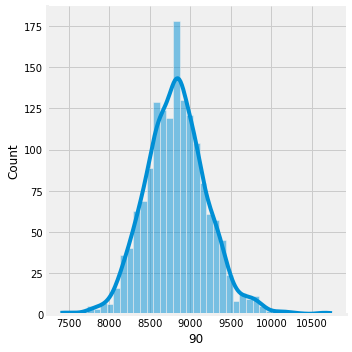

In [26]:
sns.displot(signal_data_dropfea['90'],kde=True);

We could observe that column '90' is normally distributed and no skew in it

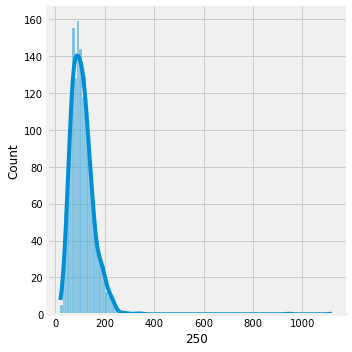

In [27]:
sns.displot(signal_data_dropfea['250'],kde=True);

We could observe that column '250' is right skewed and has many unique values (with count as 0)

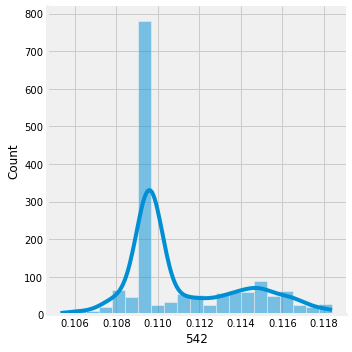

In [28]:
sns.displot(signal_data_dropfea['542'],kde=True);

For column '542' we could observe a right skew in it

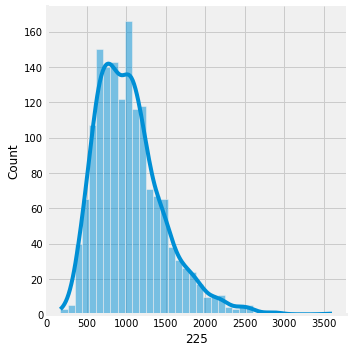

In [29]:
sns.displot(signal_data_dropfea['225'],kde=True);

column '225' is right skewed as the distribution towards right is spread out

##### B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]


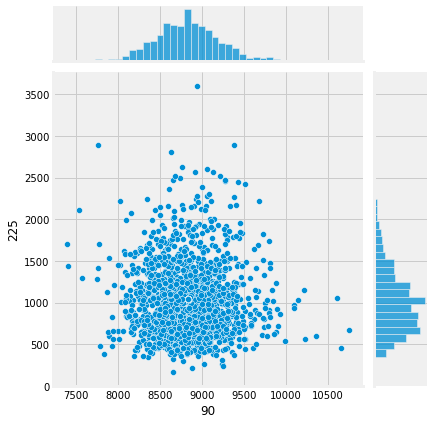

In [30]:
sns.jointplot(x = "90", y = "225", data = signal_data_dropfea)

Joint plot (bi-variate) between two columns (90 and 225) shows the values are not correlated and spread accross. Which means both 90 and 225 are independant of each other.

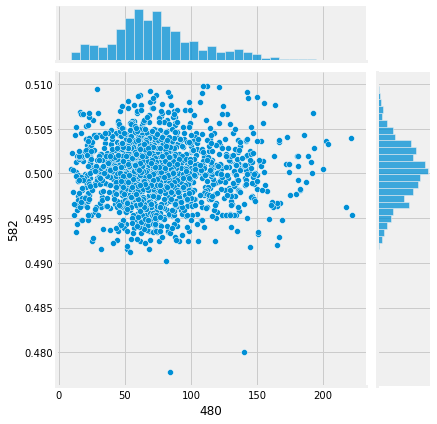

In [31]:
sns.jointplot(x = "480", y = "582", data = signal_data_dropfea)

Joint plot (bi-variate) between two columns (480 and 582) shows the values are not correlated and spread accross. Which means both 90 and 225 are independant of each other.

<AxesSubplot:>

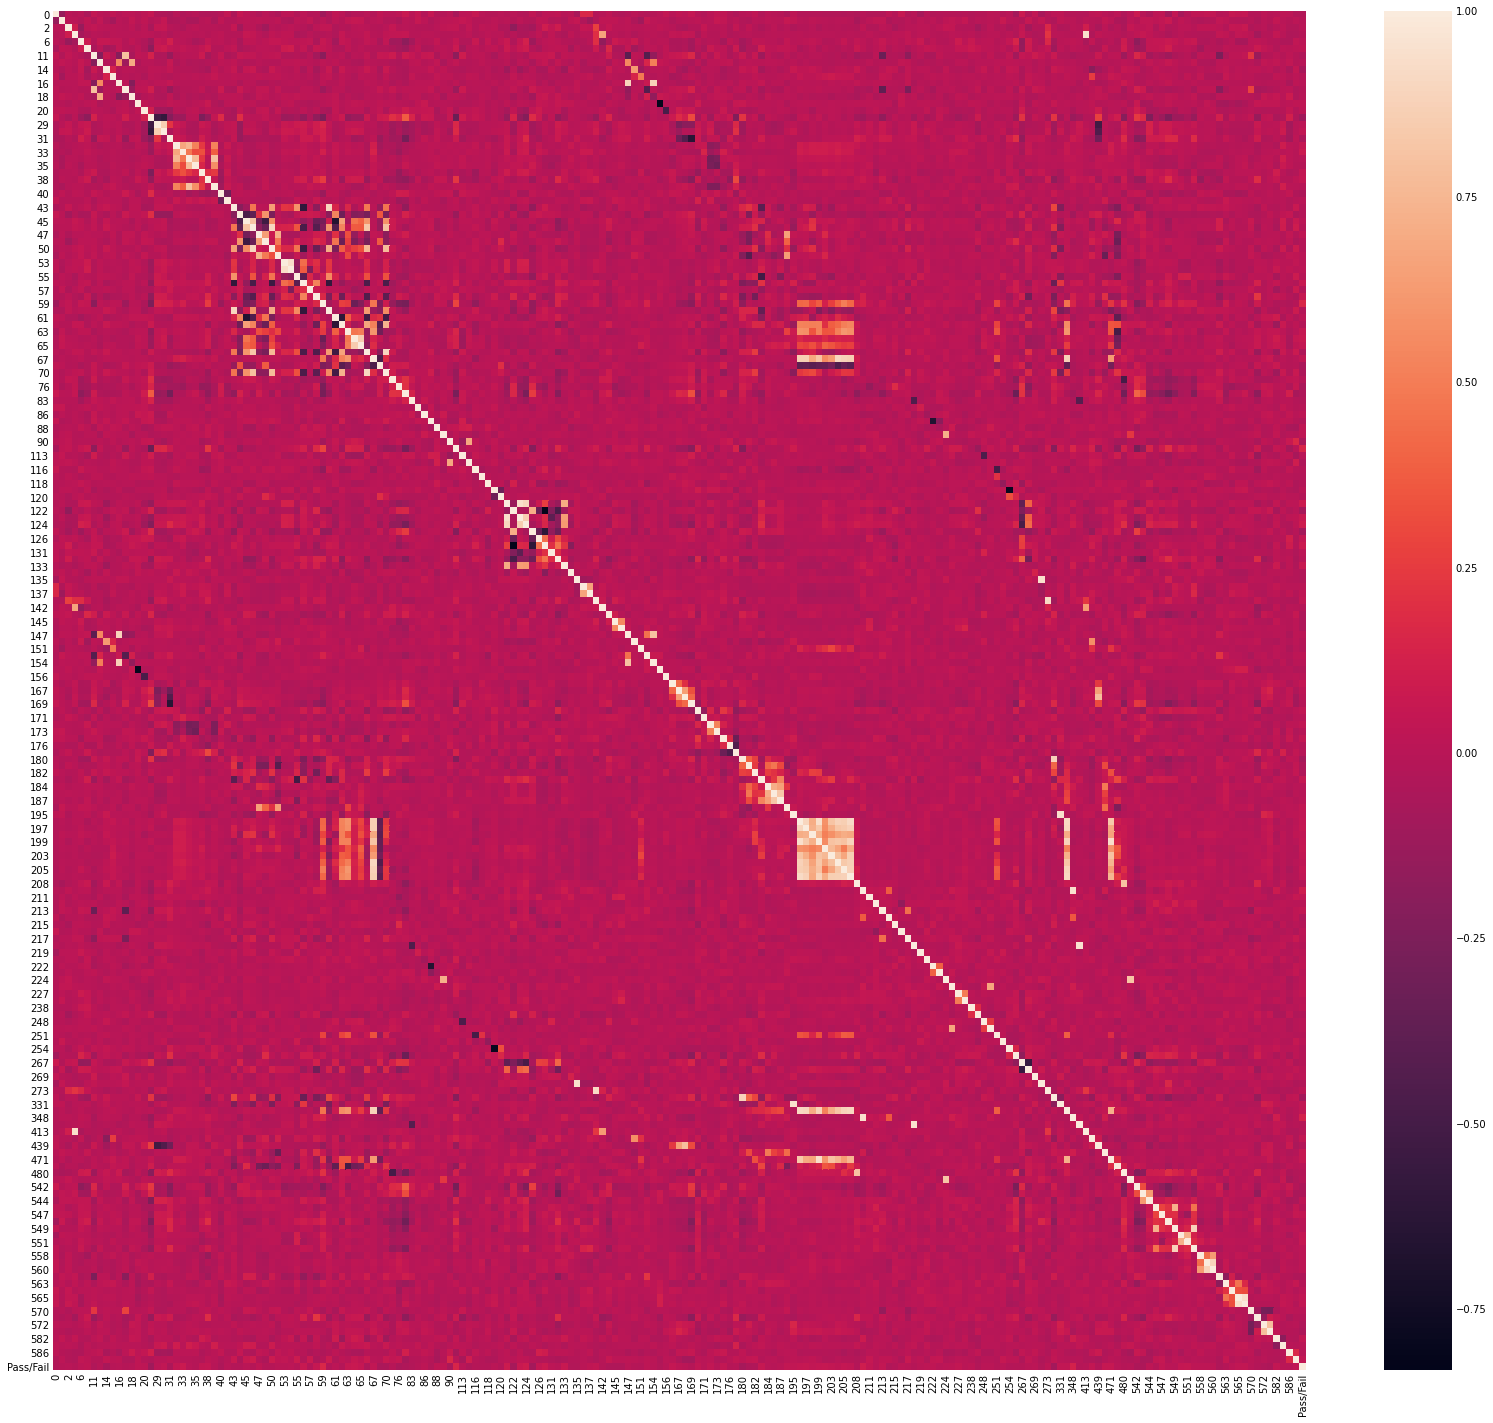

In [32]:
#Correlation
plt.figure(figsize=(25,25))
sns.heatmap(signal_data_dropfea.corr())

From the above correlation plot we can infere that most of the features are not correlated. This is because we have already dropped features with high correlation in 2.D itself.

#### 4. Data pre-processing: [10 Marks]


In [33]:
# To enable plotting graphs in Jupyter notebook
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

##### A. Segregate predictors vs target attributes. [2 Marks]


In [34]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = signal_data_dropfea.drop(labels= "Pass/Fail" , axis = 1)
y = signal_data_dropfea["Pass/Fail"]
X.head()


0        1          2       4         6       8      11        12  \
0  3030.93  2564.00  2187.7333  1.3602   97.6133  1.5005  0.9455  202.4396   
1  3095.78  2465.14  2230.4222  0.8294  102.3433  1.4966  0.9627  200.5470   
2  2932.61  2559.94  2186.4111  1.5102   95.4878  1.4436  0.9615  202.0179   
3  2988.72  2479.90  2199.0333  1.3204  104.2367  1.4882  0.9629  201.8482   
4  3032.24  2502.87  2233.3667  1.5334  100.3967  1.5031  0.9569  201.9424   

        14        15       16      17        18       19      20       28  \
0   7.9558  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026  64.2333   
1  10.1548  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825  68.4222   
2   9.5157  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123  67.1333   
3   9.6052  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011  62.9333   
4  10.5661  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888  62.8333   

       29      30      31       32      33       34       35       37  \
0  2.0222  0.1632  3.5191  83.3971  9.5126  50.6170  64.2588  66.3141   
1  2.2667  0.2102  3.4171  84.9052  9.7997  50.6596  64.2828  64.9193   
2  2.3333  0.1734  3.5986  84.7569  8.6590  50.1530  64.1114  65.8389   
3  2.6444  0.2071  3.3813  84.9105  8.6789  50.5100  64.1125  65.1951   
4  3.1556  0.2696  3.2728  86.3269  8.7677  50.2480  64.1511  66.1542   

        38        39     40     41        43       44        45        46  \
0  86.9555  117.5132  61.29  4.515  352.7173  10.1841  130.3691  723.3092   
1  87.5241  118.1188  78.25  2.773  352.2445  10.0373  133.1727  724.8264   
2  84.7327  118.6128  14.37  5.434  364.3782   9.8783  131.8027  734.7924   
3  86.6867  117.0442  76.90  1.279  363.0273   9.9305  131.8027  733.8778   
4  86.1468  121.4364  76.39  2.209  353.3400  10.4091  176.3136  789.7523   

       47        48        50        51     53     54      55      56      57  \
0  1.3072  141.2282  624.3145  218.3174  4.592  4.841  2834.0  0.9317  0.9484   
1  1.2887  145.8445  631.2618  205.1695  4.590  4.842  2853.0  0.9324  0.9479   
2  1.2992  141.0845  637.2655  185.7574  4.486  4.748  2936.0  0.9139  0.9447   
3  1.3027  142.5427  637.3727  189.9079  4.486  4.748  2936.0  0.9139  0.9447   
4  1.0341  138.0882  667.7418  233.5491  4.624  4.894  2865.0  0.9298  0.9449   

       58       59        60       61        62       63       64       65  \
0  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264  29.5367   
1  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927  27.6301   
2  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755  24.2829   
3  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209  23.4736   
4  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945  44.1498   

         66      67        68        70       71      76      78      83  \
0  693.7724  0.9226  148.6009  608.1700  84.0793 -0.0206 -0.0307  7.2163   
1  697.1964  1.1598  154.3709  620.3582  82.3494 -0.0198 -0.0440  6.8043   
2  710.5095  0.8694  145.8000  625.9636  84.7681 -0.0326  0.0213  7.1041   
3  710.4043  0.9761  147.6545  625.2945  70.2289 -0.0461  0.0400  7.5925   
4  745.6025  0.9256  146.6636  645.7636  65.8417  0.0183 -0.0449  7.5017   

       84      86      87         88      89         90     103     113  \
0  0.1320  2.3895  0.9690  1747.6049  0.1841  8671.9301 -0.0042  0.9460   
1  0.1358  2.3754  0.9894  1931.6464  0.1874  8407.0299 -0.0045  0.9425   
2  0.1362  2.4532  0.9880  1685.8514  0.1497  9317.1698 -0.0026  0.9231   
3  0.1302  2.4004  0.9904  1752.0968  0.1958  8205.7000 -0.0059  0.9564   
4  0.1342  2.4530  0.9902  1828.3846  0.1829  9014.4600 -0.0045  0.9424   

        115     116      117     118     119     120    121    122    123  \
0  748.6115  0.9908  58.4306  0.6002  0.9804  6.3788  15.88  2.639  15.94   
1  731.2517  0.9902  58.6680  0.5958  0.9731  6.5061  15.88  2.541  15.91   
2  718.5777  0.9899  58.4808  0.6015  0.9772  6.4527  15.90  2.882  15.94   
3  

##### B. Check for target balancing and fix it if found imbalanced. [3 Marks]


<AxesSubplot:>

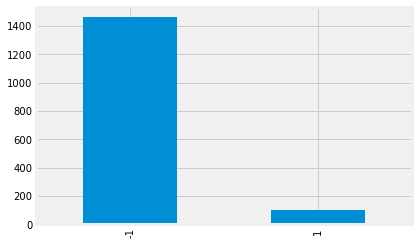

In [35]:
y.value_counts().plot(kind='bar')

We could see that the target variable is highly imbalanced. So, we are using smote to balance the target feature.

In [36]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
y = le.fit_transform(y)

le.transform([-1,1])

array([0, 1], dtype=int64)

In [37]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 1463, 1: 104})
Counter({0: 1463, 1: 1463})


Thus, the target feature is balanced, with a count of 1463.

##### C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]


In [38]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

0             1             2             4             6  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -2.623556e-15  3.468404e-16  1.318828e-14 -4.401668e-17 -2.103960e-15   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -3.573119e+00 -4.826009e+00 -5.001193e+00 -5.272734e-02 -3.627724e+00   
25%   -6.976495e-01 -5.327287e-01 -6.974387e-01 -4.308847e-02 -4.817542e-01   
50%   -1.161265e-01  4.398516e-02 -4.947292e-02 -3.750734e-02  3.767261e-02   
75%    5.403085e-01  5.355445e-01  5.639848e-01 -3.313750e-02  5.189329e-01   
max    4.725131e+00  5.036929e+00  4.183361e+00  2.706846e+01  5.284454e+00   

                  8            11            12            14            15  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -2.140689e-15 -1.243508e-14 -2.634826e-15  4.135069e-16  3.530289e-15   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -4.318706e+00 -2.875816e+01 -6.496254e+00 -2.514205e+00 -5.972820e+00   
25%   -6.484821e-01 -5.925075e-01 -5.591650e-01 -7.135217e-01 -4.219968e-01   
50%    1.630536e-02  8.057654e-02 -8.550684e-02 -2.416303e-02 -4.069290e-02   
75%    6.671455e-01  6.045730e-01  6.123227e-01  6.568976e-01  3.754382e-01   
max    2.940632e+00  1.995685e+00  2.618797e+01  4.282720e+00  3.092492e+01   

                 16            17            18            19            20  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -1.380759e-16 -1.159106e-14 -4.434783e-15  2.679288e-15 -6.539540e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -3.060775e+00 -4.073471e+01 -8.517232e+00 -1.607214e+01 -1.547302e+01   
25%   -1.723578e-01 -3.639109e-01 -6.027166e-01 -1.623605e-01 -5.571211e-01   
50%   -1.811557e-02  6.246803e-02 -1.055097e-01  3.670310e-02  4.851276e-02   
75%    1.236259e-01  4.888469e-01  6.858123e-01  3.134208e-01  6.136155e-01   
max    5.215067e+01  1.424801e+00  1.042768e+01  3.060536e+00  3.262776e+00   

                 28            29            30            31            32  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   1.349532e-15 -2.726800e-16 -7.512408e-16 -6.820321e-16  9.276016e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -2.911269e+00 -4.775867e+00 -5.143205e+00 -3.371758e+00 -1.031765e+00   
25%   -5.910875e-01 -6.540289e-01 -6.458983e-01 -5.280646e-01 -3.736639e-01   
50%   -4.922635e-02  2.796988e-02  6.984024e-02 -3.867957e-01 -1.372913e-01   
75%    5.690030e-01  6.693648e-01  6.855191e-01 -1.814597e-01  9.848082e-02   
max    2.871835e+00  3.158191e+00  3.274573e+00  2.597683e+00  9.022949e+00   

                 33            34            35            37            38  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   1.005234e-15 -2.902236e-15  4.092785e-15 -1.310706e-14  1.109616e-15   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -9.059119e-01 -6.742886e-01 -3.864269e-01 -4.923108e+00 -4.252514e+00   
25%   -2.883030e-01 -2.816470e-01 -2.191732e-01 -5.560347e-01 -5.320087e-01   
50%   -1.891785e-01 -1.729211e-01 -1.585457e-01 -1.171971e-04 -8.634369e-02   
75%   -7.097777e-03 -3.401684e-02 -9.527703e-02  5.063352e-01  2.889772e-01   
max    8.355262e+00  8.272797e+00  1.393922e+01  6.363040e+00  3.006725e+00   

                 39            40            41            43            44  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -5.368100e-15  3.598549e-16  2.497053e-16  9.336877e-15 -9.307509e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -4.356359e+00 -2.847552e+00 -1.891753e+00 -2.275049e+00 -3.637710e+00   
25%   -3.781977e-01 -2.785259e-02 -3.580776e-01 -7.521724e-01 -

In [39]:
# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(XScaled,y, train_size=0.8)

In [40]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(X.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(X.index)) * 100))

79.97% data is in training set
20.03% data is in test set


##### D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]


C:\Users\laksh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


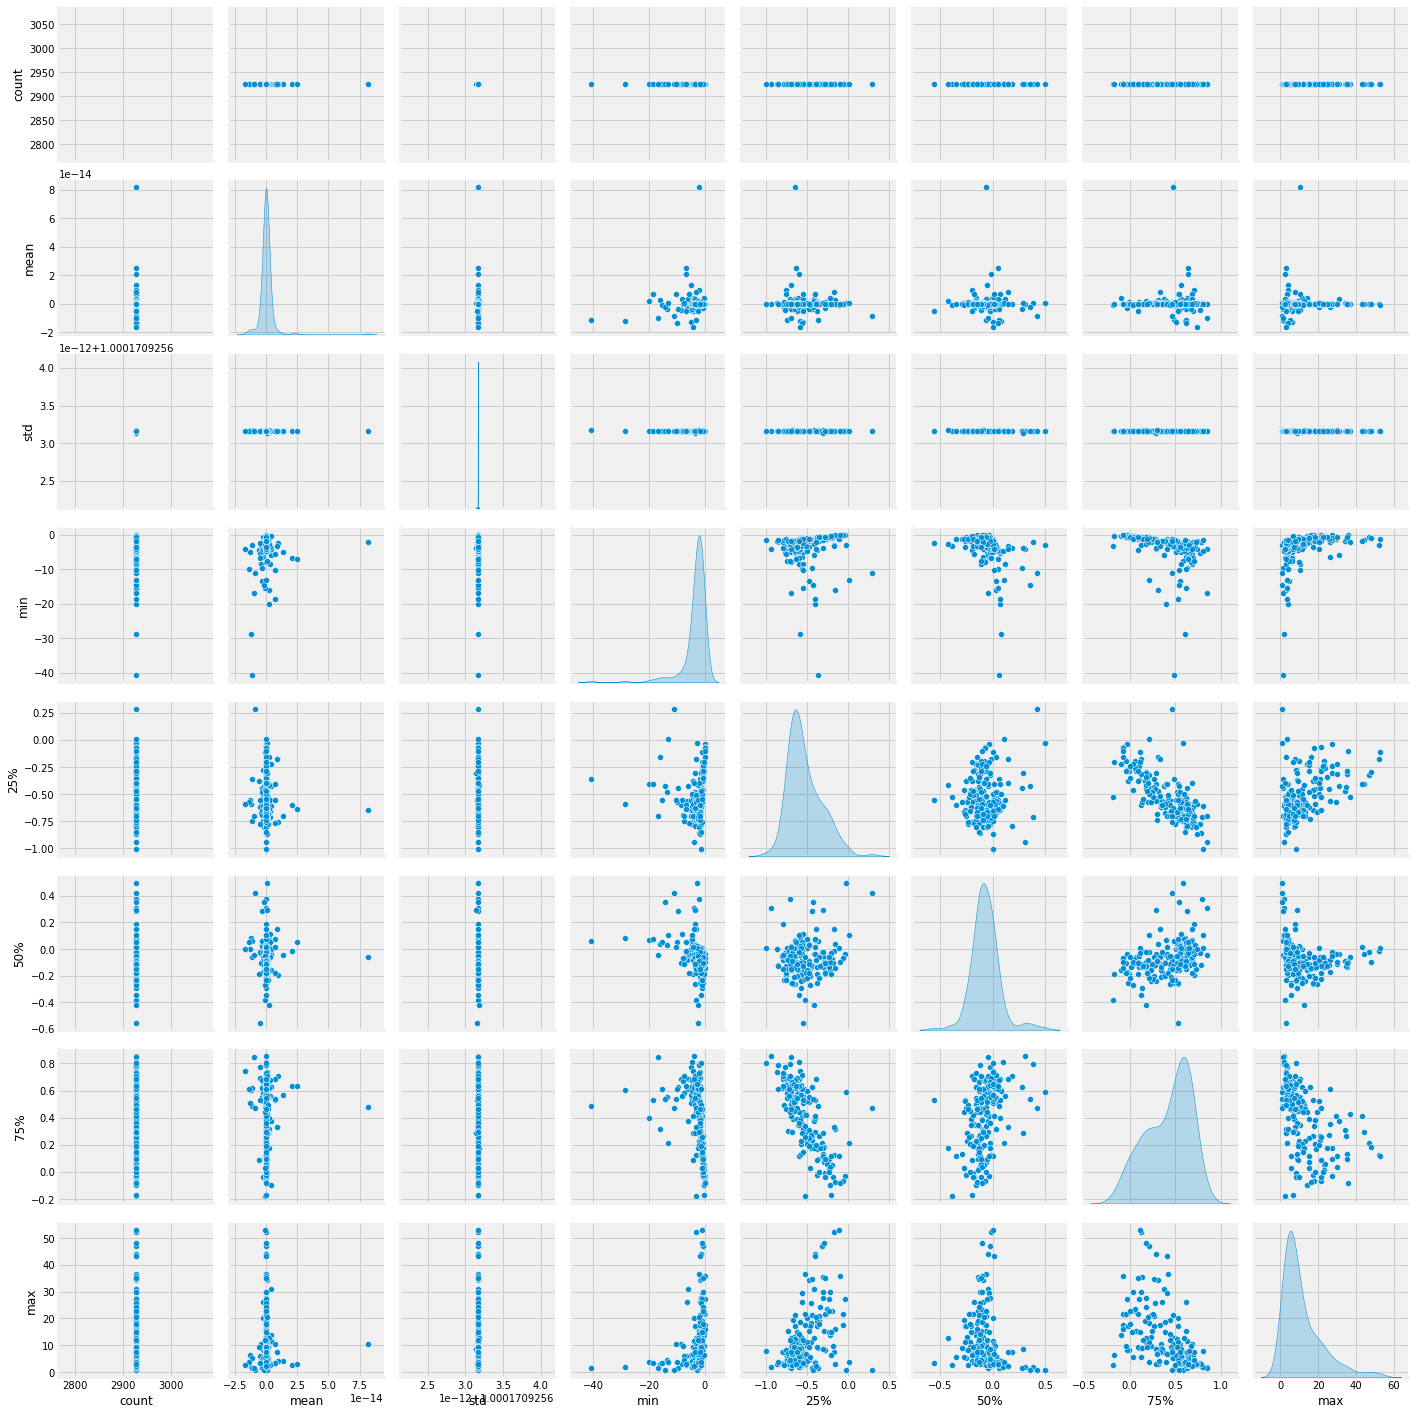

In [41]:
a=XScaled.describe().T
sns.pairplot(a,diag_kind='kde',palette="husl")

C:\Users\laksh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


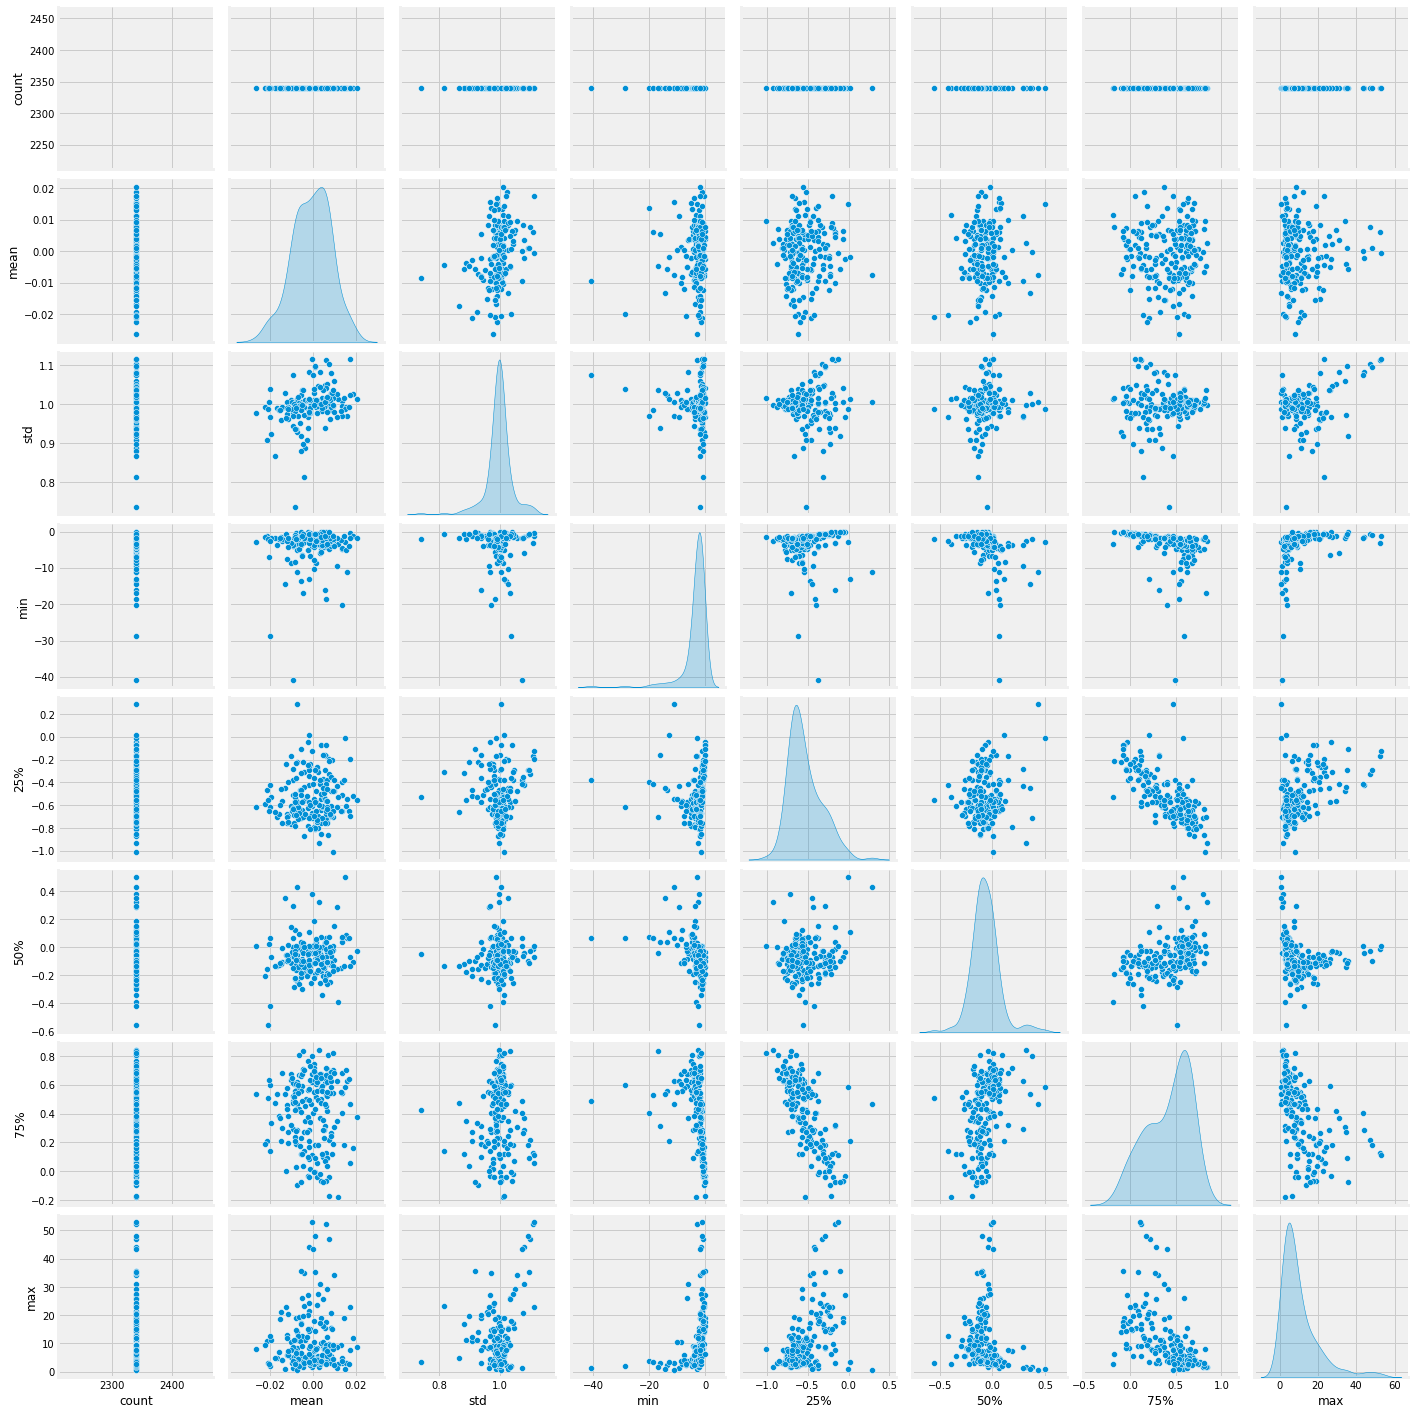

In [42]:
b=X_train.describe().T
sns.pairplot(b,diag_kind='kde',palette="husl")

C:\Users\laksh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


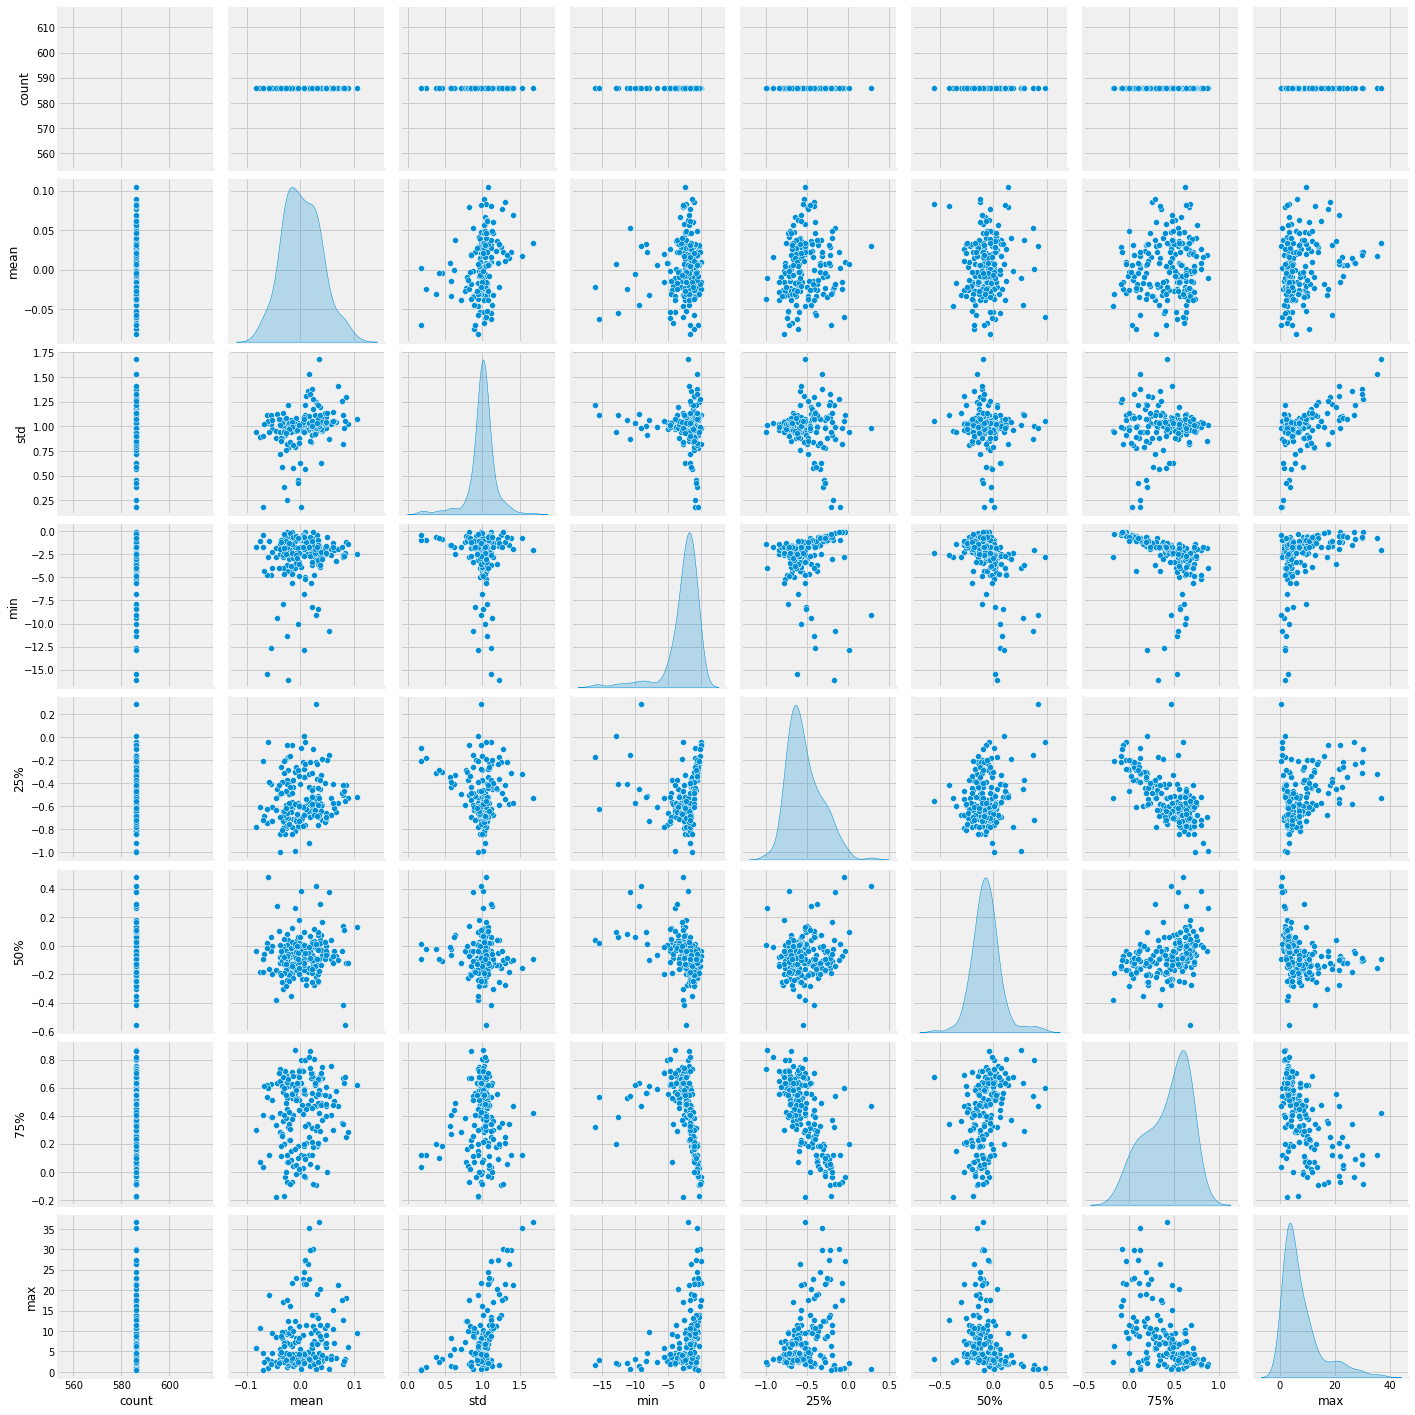

In [43]:
c=X_test.describe().T
sns.pairplot(c,diag_kind='kde',palette="husl")

From the above statistical results, we could observe that X_train and X_test has similar distribution when compared among each other. Whereas, when compared to the orginal data, the characteristics is different from X_train and X_test. As, the distribution of mean, std, min, q1, q2, q3, max all features varies and the distribution is different. 

#### 5. Model training, testing and tuning: [20 Marks]


##### A. Use any Supervised Learning technique to train a model. [2 Marks]


Here, we are using RandomForestClassifier to train the model

In [44]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Common function to get accuracy, recall, precision, and other metrics for all models
def train_and_predict(n_splits, base_model, X, y, name, subscribe = 1, oversampling = False):
    features = X.columns
    X = np.array(X)
    y = np.array(y)
    
    folds = list(StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state).split(X, y))
    
    train_pred = np.zeros((X.shape[0], len(base_model)))
    
    train_score = []
    test_score = []
    accuracy = []
    
    r2_app = []
    precision_subscribe = []
    recall_subscribe = []
    f1_subscribe = []
    
    precision_macro = []
    recall_macro = []
    f1_macro = []

    auc_score = []
    
    for i, clf in enumerate(base_model):
        for j, (train, test) in enumerate(folds):
            
            # Creating train and test sets
            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]
            
            if oversampling:
                sm = SMOTE(random_state = random_state, sampling_strategy = 'minority')
                X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
           
            # fit the model
                if (name.capitalize().__contains__('Xgb')):
                    clf.fit(X_train_res, y_train_res, eval_metric='rmse')
                else:
                    clf.fit(X_train_res, y_train_res)
                    
            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train_res, y_train_res)
                test_ = clf.score(X_test, y_test)
            
            else:
            
            # fit the model
            
                if (name.capitalize().__contains__('Xgb')):
                    clf.fit(X_train, y_train, eval_metric='rmse')
                else:
                    clf.fit(X_train, y_train)
                    
            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train, y_train)
                test_ = clf.score(X_test, y_test)
                      
            # Other scores
            accuracy_ = accuracy_score(y_true, y_pred).round(3)

            auc_score_ = roc_auc_score(y_true, y_pred)
            
            r2_score_ = r2_score(y_true,y_pred, multioutput='variance_weighted')
            
            precision_b = precision_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            recall_b = recall_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            f1_b = f1_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            
            precision_m = precision_score(y_true, y_pred, average = 'macro').round(3)
            recall_m = recall_score(y_true, y_pred, average = 'macro').round(3)
            f1_m = f1_score(y_true, y_pred, average = 'macro').round(3)

            rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # Root mean squared error
            
            rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))  # Root mean squared log error (since the numbers are huge)
            
            scorer = {'r2' : make_scorer(r2_score),
                      'mse' : make_scorer(mean_squared_error),
                      'msle' : make_scorer(mean_squared_log_error),
                       }    # make scorers to be used in cross validation

            if (name.capitalize().__contains__('Xgb')):
                fit_params = {'eval_metric' : "rmse"}
                cv = cross_validate(clf, X_train, y_train, cv=10, scoring = scorer, fit_params = fit_params)
            else:
                cv = cross_validate(clf, X_train, y_train, cv=10, scoring = scorer)
            
            r2_cv = cv['test_r2'].mean()                                     # mean r squared value
            rmse_cv = np.mean([np.sqrt(mse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
            rmsle_cv = np.mean([np.sqrt(msle) for msle in cv['test_msle']]) # mean RMSLE
            
            ## Appending scores   
            train_score.append(train_)
            test_score.append(test_)
            auc_score.append(auc_score_)
            accuracy.append(accuracy_)
            r2_app.append(r2_score_)
            precision_subscribe.append(precision_b)
            recall_subscribe.append(recall_b)
            f1_subscribe.append(f1_b)
            precision_macro.append(precision_m)
            recall_macro.append(recall_m)
            f1_macro.append(f1_m)
                       
            # Creating a dataframe of scores
            df = pd.DataFrame([np.mean(train_score).round(3), np.mean(test_score).round(3), np.mean(accuracy).round(3),   
                               np.mean(precision_macro).round(3), np.mean(recall_macro).round(3), 
                                r2_cv.round(3), rmse_cv.round(3), rmsle_cv.round(3),
                               np.mean(f1_macro).round(3), np.mean(auc_score).round(3),clf], columns = [name]).T
            df.columns = ['Train Score', 'Test Score', 'Accuracy', 'Precision', 'Recall', 
                          'R2 CV Score',  'RMSE CV Score', 'RMSLE CV Score', 'f1', 'AUC Score', 'model']
    print('\n')
    cm=confusion_matrix(y_true, y_pred, labels=[1,0])

    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
    plt.xlabel('Actual Classes', fontsize = 15)
    plt.ylabel('Predicted Classes', fontsize = 15)
    plt.title(f'Confusion Matrix HeatMap - Model- {name.capitalize()}', fontsize = 15)
    plt.show()
    # Calculate the AUC
    fpr, tpr, _ = roc_curve(y_true,  y_pred)
    auc_obt = roc_auc_score(y_true, y_pred)

    #create ROC curve

    plt.figure(figsize = (7,5))
    plt.plot(fpr,tpr,label="AUC="+str(auc_obt))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f'ROC curve - Model- {name.capitalize()}', fontsize = 15)
    plt.legend(loc=4)
    plt.show()
    return df

In [46]:
# Function which performs Random Forest
def randomforest(X, y):
    # Random Forest Classifier
    rfc = RandomForestClassifier(n_jobs = -1, random_state = random_state)
    base_model = [rfc]
    n_splits = 5
    df = train_and_predict(n_splits, base_model, X, y, 'Random Forest Classifier')
    return df

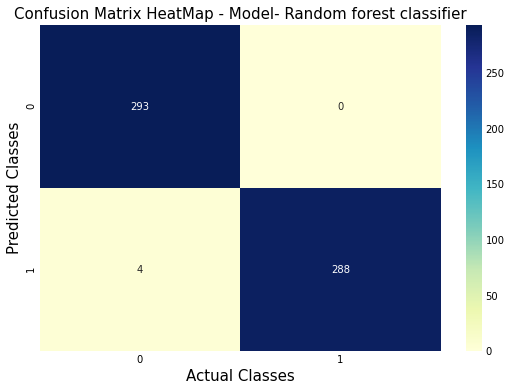

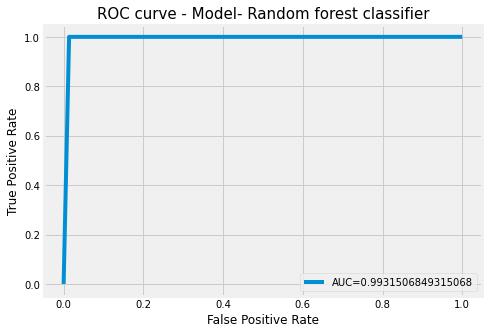

Train Score Test Score Accuracy Precision Recall  \
Random Forest Classifier         1.0      0.989    0.989     0.989  0.989   

                         R2 CV Score RMSE CV Score RMSLE CV Score     f1  \
Random Forest Classifier        0.84         0.135          0.094  0.989   

                         AUC Score  \
Random Forest Classifier     0.989   

                                                                      model  
Random Forest Classifier  (DecisionTreeClassifier(max_features='sqrt', r...

In [47]:
df = randomforest(XScaled, y)
df

##### B. Use cross validation techniques. [3 Marks]
##### Hint: Use all CV techniques that you have learnt in the course.


In [48]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


### Holdout

In [49]:
model = RandomForestClassifier(n_jobs = -1, random_state = random_state)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9914675767918089

### K-Fold

In [50]:
def kfold(num_folds, seed, XScaled, y, model):
    kfold = KFold(n_splits=num_folds)
    results = cross_val_score(model, XScaled, y, cv=kfold)
    print(results)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

In [51]:
num_folds = 50
seed = 7
model = RandomForestClassifier(n_estimators=50)
kfold(num_folds, seed, XScaled, y, model)

[0.71186441 0.91525424 0.94915254 0.89830508 0.98305085 0.98305085
 0.96610169 0.98305085 0.98305085 0.98305085 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.98305085 1.
 1.         1.         0.98275862 0.98275862 1.         0.98275862
 1.         0.98275862 0.98275862 0.98275862 1.         1.
 0.98275862 0.98275862 0.98275862 0.98275862 1.         1.
 0.98275862 1.         0.98275862 0.98275862 1.         1.
 1.         0.98275862]
Accuracy: 98.195% (4.333%)


1. Distribution of the scores on 50 iterations

2. Model accuracy is likely to be in 0.98 – 0.04 to 0.98 + 0.04 i.e. 0.94 – 0.99 at 95% confidence level

### Stratified K-Fold

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
model = RandomForestClassifier(n_estimators=50)
results = cross_val_score(model, XScaled, y, cv=cv_method)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 98.644% (0.382%)


1. Distribution of the scores on 50 iterations

2. Model accuracy is likely to be in 0.98 – 0.04 to 0.98 + 0.04 i.e. 0.94 – 0.99 at 95% confidence level

### Leave One Out Cross validation (LOOCV)

In [53]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [54]:
def loocv(XScaled, y, model):
    loocv = LeaveOneOut()
    results = cross_val_score(model, XScaled, y, cv=loocv, n_jobs=-1, scoring='neg_mean_absolute_error')
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

In [55]:
model = RandomForestClassifier(n_estimators=50)

We have approx 3000 rows and 200 columns, which is huge and loocv will take more time and not recommended for this case.
Just to learn its use case, here we are considering randomly choosen 500 rows.

In [56]:
Xloocv = XScaled.sample(500)
yloocv = pd.DataFrame(y)
yloocv = yloocv.sample(500)

In [57]:
loocv(Xloocv, yloocv, model)

Accuracy: -51.800% (49.968%)


### Bootstrap Sampling

In [58]:
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot


In [59]:
def bootstrap(df, model):
    # load dataset
    values = df.values
    # configure bootstrap
    n_iterations = 10 # Number of bootstrap samples to create
    n_size = int(len(df) * 0.50) # picking only 50 % of the given data in every bootstrap sample
    # run bootstrap
    stats = list()
    for i in range(n_iterations):
    # prepare train and test sets
        train = resample(values, n_samples=n_size) # Sampling with replacement 
        test = np.array([x for x in values if x.tolist() not in train.tolist()]) # picking rest of the data not considered in sample
    # fit model
        model.fit(train[:,:-1], train[:,-1])
    # evaluate model
        predictions = model.predict(test[:,:-1])
        score = accuracy_score(test[:,-1], predictions) # caution, overall accuracy score can mislead when classes are imbalanced
        stats.append(score)
    # plot scores
    pyplot.hist(stats)
    pyplot.show()
    # confidence intervals
    alpha = 0.95 # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100 # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(stats, p)) 
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

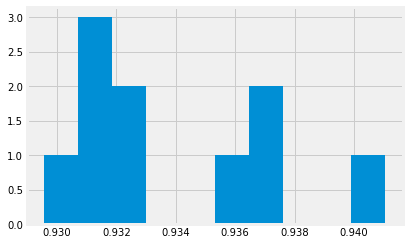

95.0 confidence interval 93.0% and 94.0%


In [60]:
bootstrap(signal_data_dropfea, model)

1. Distribution of the scores on 10 iterations

2. Model accuracy is likely to be in 93% and 94.0% at 95% confidence level

Thus, from CV Techniques we could infere that the model has very good accuracy. So, the model has good predictive capability and hence accuracy.

##### C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 


In [61]:
def hyperparameter(model, param_dist, samples, XScaled, y, param_grid, name):
    randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=samples)
    randomCV.fit(XScaled, y)
    
    grid_search = GridSearchCV(model, param_grid=param_grid)
    grid_search.fit(XScaled, y)
    
    print('RandomizedSearchCV mean_test_score:', randomCV.cv_results_['mean_test_score'])
    print('RandomizedSearchCV best_params:', randomCV.best_params_)
    print('RandomizedSearchCV best_estimator:', randomCV.best_estimator_)
    
    print('GridSearchCV mean_test_score:', grid_search.cv_results_['mean_test_score'])
    print('GridSearchCV best_params:', grid_search.best_params_)
    print('GridSearchCV best_estimator:', grid_search.best_estimator_) 

    
    # Model with Random hyperparameter tuning, Oversampled
    rand_hyp = randomCV.best_estimator_
    base_model_rand = [rand_hyp]
    n_splits = 5
    print('RandomizedSearchCV:')
    df1 = train_and_predict(n_splits, base_model_rand, XScaled, y, name)
    
    # Model with Grid hyperparameter tuning, Oversampled
    grid_hyp = grid_search.best_estimator_
    base_model_grid = [grid_hyp]
    n_splits = 5
    print('GridSearchCV:')
    df2 = train_and_predict(n_splits, base_model_grid, XScaled, y, name)
    df2

    return df1, df2, base_model_grid, base_model_rand
    

RandomizedSearchCV mean_test_score: [0.95459642 0.75368455 0.96995712]
RandomizedSearchCV best_params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
RandomizedSearchCV best_estimator: RandomForestClassifier(bootstrap=False, max_features=2, min_samples_split=4,
                       n_estimators=50)
GridSearchCV mean_test_score: [0.79981039 0.81895219 0.79399667 0.79059071 0.79911204 0.82271987
 0.79365888 0.81996441 0.76530848 0.75778945 0.76667017 0.77932091
 0.7499262  0.77454683 0.76770631 0.7687302  0.96960999 0.97644293
 0.95731455 0.96687611 0.89344593 0.91975263 0.90607567 0.92076369
 0.93001429 0.93650069 0.9334261  0.92660016 0.88902249 0.89073656
 0.89004346 0.88902657 0.7997888  0.81553047 0.82782358 0.82680494
 0.79226394 0.8059619  0.8138059  0.81448908 0.75369447 0.76839007
 0.76428109 0.77898194 0.75026808 0.75847321 0.7512943  0.7711222
 0.9661976  0.97371255 0.96073277

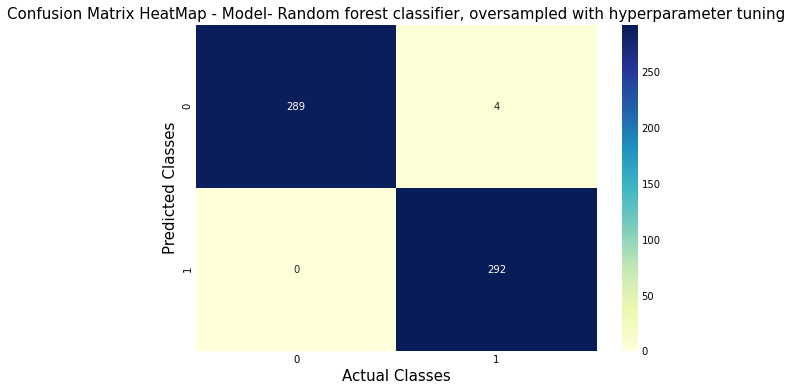

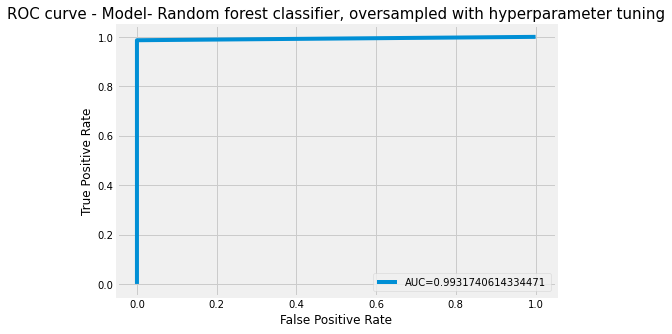

GridSearchCV:




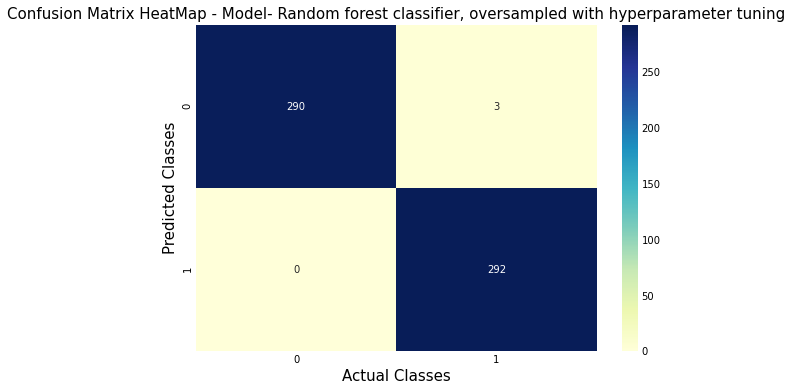

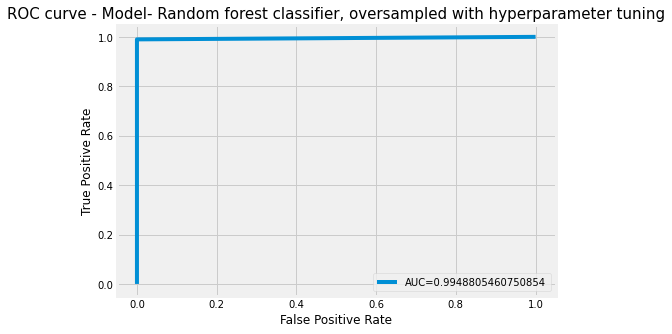

Train Score Test Score  \
Random Forest Classifier, Oversampled With Hype...         1.0      0.996   

                                                   Accuracy Precision Recall  \
Random Forest Classifier, Oversampled With Hype...    0.996     0.996  0.996   

                                                   R2 CV Score RMSE CV Score  \
Random Forest Classifier, Oversampled With Hype...       0.962         0.072   

                                                   RMSLE CV Score     f1  \
Random Forest Classifier, Oversampled With Hype...           0.05  0.996   

                                                   AUC Score  \
Random Forest Classifier, Oversampled With Hype...     0.996   

                                                                                                model  
Random Forest Classifier, Oversampled With Hype...  (DecisionTreeClassifier(max_features=1, random...

In [62]:
model = RandomForestClassifier(n_estimators=50)
samples = 3  # number of random samples 

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [50, 100]}

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 10],
              "min_samples_split": [2, 10],
              "min_samples_leaf": [1, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [50, 100]}

name = 'Random Forest Classifier, Oversampled With Hyperparameter Tuning'

df1, df2, base_model_grid, base_model_rand = hyperparameter(model, param_dist, samples, XScaled, y, param_grid, name)
df1
df2

##### D. Use any other technique/method which can enhance the model performance. [4 Marks]
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.


We have already carried out attribute removal, standardisation, normalisation and target balancing in the previous questions. 

Below is the list of all the modifications made to the data:

**1. Removed all the features with 20%+ Null values and impute rest with the mean of the feature.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    for cols in signal_data_impute.columns: # Loop through all columns in the dataframe
    if (signal_data_impute[cols].dtypes != 'object'):
        if (signal_data_impute[cols].isnull().sum()* 100 / len(signal_data_impute)) > 20:
            signal_data_impute.drop(cols, axis=1, inplace=True) 
        else:
            signal_data_impute[cols] = signal_data_impute[cols].fillna(signal_data_impute[cols].mean())
    
**2. Dropped the features which are having the same value for all the rows.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    colu = []
    for cols in signal_data_dropfea.columns: # Loop through all columns in the dataframe
        if (len(signal_data_dropfea[cols].drop_duplicates())) == 1:
            signal_data_dropfea.drop(cols, axis=1, inplace=True)
            colu.append(cols) 
    
**3. Dropped the features that were having zero standard deviation.** We can drop the features that has zero standard deviation as When the standard deviation is zero, there is no spread; that is, the all the data values are equal to each other. The standard deviation is small when the data are all concentrated close to the mean, and is larger when the data values show more variation from the mean
    
    # Find features with zero standard deviation
    to_drop_std = [column for column in signal_data_dropfea.columns if any(signal_data_dropfea[column] == 0)]

    #Drop features 
    signal_data_dropfea.drop(to_drop_std, axis=1, inplace=True)
    
**4. Removed the feature "Time" as it is neither a numerical nor a categorical feature. Also, the data is not a time-dependant data.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    signal_data_dropfea.drop("Time", axis=1, inplace=True)
    
**5. Dropped the features having high correlation.** Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.
    
    # Create correlation matrix
    corr_matrix = signal_data_dropfea.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

    # Drop features 
    signal_data_dropfea.drop(to_drop, axis=1, inplace=True)
    
**6. We can do different feature engineering steps like PCA, LDA.** Having unimportant features has nothing to do with improving model accuracy whereas it increases the computational time. So, we need to drop those features.

    pca = PCA(n_components=95)
    pca.fit(X_train)

    # Applying PCA on Data
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    
#### Assumptions:
1. We assumed the features with more than 0.95 correlation as highly correlated feature.

2. Data is not a time-dependant data.

So, we are going to perform dimensionality reduction using PCA.

In [63]:
from sklearn.decomposition import PCA

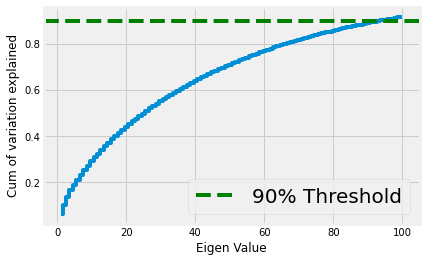

In [64]:
Threshold = 0.9
pca = PCA(n_components=100)
pca.fit(X_train)
plt.step(list(range(1,101)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.rcParams["figure.figsize"] = (12,12)
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.axhline(Threshold, color = 'g', linestyle = '--', label = '90% Threshold')
plt.legend(loc ="lower right", fontsize=20); plt.show()

Minimum component with 90% or above variance is 95. So, choosing that component

In [65]:
pca = PCA(n_components=95)
pca.fit(X_train)

PCA(n_components=95)

In [66]:
print("The Eigen Values")
print(pca.explained_variance_)

The Eigen Values
[11.9178589   7.70258812  7.38435108  5.47673845  4.47747859  4.19869529
  4.12599798  3.89017764  3.77608937  3.74285259  3.44862853  3.18608556
  3.16484099  3.10517186  2.86437917  2.83637085  2.67285063  2.65383002
  2.61865565  2.5236251   2.45433101  2.3453408   2.28082847  2.22447835
  2.20013199  2.16375651  2.14686179  2.06127035  2.00020343  1.96960759
  1.86138362  1.84348623  1.81327171  1.81133864  1.73918153  1.69985645
  1.65463827  1.64010368  1.59461585  1.58040961  1.51217833  1.46307788
  1.44728437  1.43145627  1.40419819  1.39478703  1.34692801  1.33013009
  1.28790565  1.25058036  1.23333385  1.20752339  1.17512346  1.15843894
  1.13037594  1.12315189  1.09476515  1.08912717  1.07770496  1.05284412
  1.04056801  1.01895267  0.98769612  0.98012866  0.95931854  0.94786443
  0.90321581  0.89196581  0.88688184  0.87198326  0.84518432  0.83881455
  0.82545596  0.81331461  0.78287042  0.76493468  0.74531872  0.73255655
  0.71607167  0.70642574  0.688203

In [67]:
print("The Eigen Vectors")
print(pca.components_)

The Eigen Vectors
[[-0.01237902 -0.01505499 -0.01773092 ...  0.02301554  0.00498043
   0.0168885 ]
 [-0.04788483  0.02150259 -0.02082856 ... -0.02077338  0.01212363
   0.01992741]
 [ 0.07762945 -0.00463538 -0.03615675 ... -0.02553376  0.06093791
  -0.03688705]
 ...
 [ 0.14759643 -0.0114994  -0.16249477 ... -0.04956322 -0.02158016
  -0.03857558]
 [ 0.10655652  0.16717167 -0.19346565 ... -0.0438539   0.00279127
   0.15650233]
 [ 0.03164144  0.00929812 -0.00737445 ...  0.03542327 -0.04092173
  -0.01092498]]


In [68]:
# Applying PCA on Data
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [69]:
def pca_dim(base_model_grid, base_model_rand, X_t_train, X_t_test):
    base_model_grid.fit(X_train, y_train)
    print ('Grid model - Before PCA score', base_model_grid.score(X_test, y_test))

    base_model_grid.fit(X_t_train, y_train)
    print ('Grid model - After PCA score', base_model_grid.score(X_t_test, y_test))
    
    base_model_rand.fit(X_train, y_train)
    print ('Random model - Before PCA score', base_model_rand.score(X_test, y_test))

    base_model_rand.fit(X_t_train, y_train)
    print ('Random model - After PCA score', base_model_rand.score(X_t_test, y_test))

In [70]:
[bmg] = base_model_grid[:1]
[bmr] = base_model_rand[:1]

In [71]:
pca_dim(bmg, bmr, X_t_train, X_t_test)

Grid model - Before PCA score 0.9948805460750854
Grid model - After PCA score 0.9965870307167235
Random model - Before PCA score 0.9948805460750854
Random model - After PCA score 0.9965870307167235


After PCA the accuracy has improved as there is an increase in model performance.

##### E. Display and explain the classification report in detail. [3 Marks]


In [72]:
print('Accuracy Score of Traning Data: ')
print(bmg.score(X_t_train,y_train))

Accuracy Score of Traning Data: 
1.0


In [73]:
y_pred = bmg.predict(X_t_test)

In [74]:
Precision_bal =precision_score(y_test, y_pred, average='weighted')
print("Precision:{0:.4f}".format(Precision_bal))
Recall_bal =recall_score(y_test, y_pred, average='weighted')
print("Recall:{0:.4f}".format(Recall_bal))
Accuracy_bal =accuracy_score(y_test, y_pred)
print("Accuracy:{0:.4f}".format(Accuracy_bal))

Precision:0.9966
Recall:0.9966
Accuracy:0.9966


In [75]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       290
           1       1.00      0.99      1.00       296

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



Text(0.5, 1.0, 'Confusion Matrix HeatMap the Model')

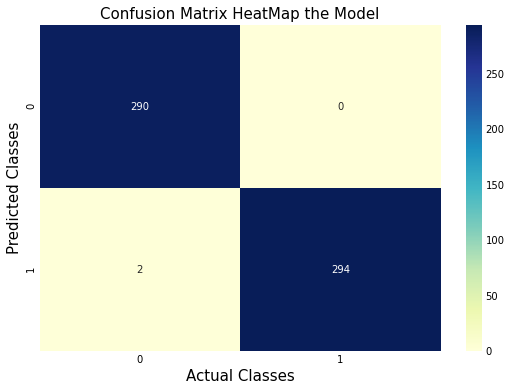

In [76]:
#visualization of confusion matrix in the form of a heatmap
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cfm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap the Model', fontsize = 15)

Thus, after doing PCA we have reduced the dimensions from 190 to 95, but there is no much impact in accuracy as it still remains 99%. Having these features has nothing to do with improving model accuracy whereas it increases the computational time. So, we dropped those features.

##### F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [78]:
pipeline_lr=Pipeline([('scalar1',MinMaxScaler()),
                     ('pca1',PCA(n_components=95)), 
                     ('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=95)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_svm = Pipeline([('scalar3', StandardScaler()),
                      ('pca3', PCA(n_components=95)),
                      ('svm_classifier', svm.SVC())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=95)),
                     ('knn_classifier',KNeighborsClassifier())])
pipeline_nb=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=95)),
                     ('nb_classifier',GaussianNB())])
pipeline_rf=Pipeline([('scalar6',StandardScaler()),
                     ('pca6',PCA(n_components=95)),
                     ('rf_classifier',RandomForestClassifier())])
pipeline_bg=Pipeline([('scalar7',StandardScaler()),
                     ('pca7',PCA(n_components=95)),
                     ('bg_classifier',BaggingClassifier())])
pipeline_cat=Pipeline([('scalar8',StandardScaler()),
                     ('pca8',PCA(n_components=95)),
                     ('cat_classifier',RandomForestClassifier())])
pipeline_lgbm=Pipeline([('scalar9',StandardScaler()),
                     ('pca9',PCA(n_components=95)),
                     ('lgbm_classifier',RandomForestClassifier())])
pipeline_xgb=Pipeline([('scalar10',StandardScaler()),
                     ('pca10',PCA(n_components=95)),
                     ('xgb_classifier',RandomForestClassifier())])
pipeline_gb=Pipeline([('scalar11',StandardScaler()),
                     ('pca11',PCA(n_components=95)),
                     ('gb_classifier',RandomForestClassifier())])
pipeline_ada=Pipeline([('scalar12',StandardScaler()),
                     ('pca12',PCA(n_components=95)),
                     ('ada_classifier',RandomForestClassifier())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_svm, pipeline_knn, pipeline_nb, pipeline_rf, pipeline_bg, pipeline_cat,
            pipeline_lgbm, pipeline_xgb, pipeline_gb, pipeline_ada]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor',
            4:'Gaussian NB', 5:'Random Forest', 6:'Bagging', 7:'catboost', 8:'lightgbm', 9:'xgboost',
             10:'GradientBoostingClassifier', 11:'AdaBoostClassifier'}
for pipe in pipelines:
  pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy:0.8088737201365188
Decision Tree Test Accuracy:0.9061433447098977
Support Vector Machine Test Accuracy:0.9795221843003413
K Nearest Neighbor Test Accuracy:0.7372013651877133
Gaussian NB Test Accuracy:0.8907849829351536
Random Forest Test Accuracy:0.9948805460750854
Bagging Test Accuracy:0.9658703071672355
catboost Test Accuracy:0.9948805460750854
lightgbm Test Accuracy:0.9897610921501706
xgboost Test Accuracy:0.9948805460750854
GradientBoostingClassifier Test Accuracy:0.9965870307167235
AdaBoostClassifier Test Accuracy:0.9948805460750854


In [79]:
#Logistic Regression
param_grid = { "lr_classifier": [LogisticRegression()],   
    'lr_classifier__C' : np.logspace(-10, 10, 20),
    'lr_classifier__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'lr_classifier__max_iter' : [1000,2500, 5000],
    'lr_classifier__penalty' : ['l2']
    }

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
lr_clf = RandomizedSearchCV(pipeline_lr, param_grid, cv=cv_method)
lr_clf.fit(X_train, y_train)
print('Logistic Regression Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, lr_clf.predict(X_test)))

Logistic Regression Test Accuracy after hyperparameter tuning: 0.8156996587030717


In [80]:
# GaussianNB

params_NB = {
    'nb_classifier__var_smoothing': np.logspace(0,-9, num=100)}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
nb_clf = RandomizedSearchCV(pipeline_nb, params_NB, cv=cv_method)
nb_clf.fit(X_train, y_train)
print('GaussianNB Test Accuracy after hyperparameter tuning:',accuracy_score(y_test, nb_clf.predict(X_test)))



GaussianNB Test Accuracy after hyperparameter tuning: 0.8907849829351536


In [81]:
# DecisionTreeClassifier
# Creating the hyperparameter grid
param_dist = {"dt_classifier__max_depth": [3, None],
              "dt_classifier__max_features": randint(1, 9),
              "dt_classifier__min_samples_leaf": randint(1, 9),
              "dt_classifier__criterion": ["gini", "entropy"]}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
dt_clf = RandomizedSearchCV(pipeline_dt, param_dist, cv=cv_method)
dt_clf.fit(X_train, y_train)
print('DecisionTreeClassifier Test Accuracy after hyperparameter tuning:',accuracy_score(y_test, dt_clf.predict(X_test)))

DecisionTreeClassifier Test Accuracy after hyperparameter tuning: 0.8703071672354948


In [82]:
# KNN
#List Hyperparameters that we want to tune.

param_dist = {"knn_classifier__leaf_size": list(range(1,50)),
              "knn_classifier__n_neighbors": list(range(1,30))}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
knn_clf = RandomizedSearchCV(pipeline_knn, param_dist, cv=cv_method)
knn_clf.fit(X_train, y_train)
print('KNN Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, knn_clf.predict(X_test)))


KNN Test Accuracy after hyperparameter tuning: 0.7952218430034129


In [83]:
# SVM
# defining parameter range
param_grid = {'svm_classifier__C': [0.1, 1, 10, 100, 1000], 
              'svm_classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svm_classifier__kernel': ['rbf']} 

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
svm_clf = RandomizedSearchCV(pipeline_svm, param_grid, cv=cv_method)
svm_clf.fit(X_train, y_train)
print('SVM Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, svm_clf.predict(X_test)))

SVM Test Accuracy after hyperparameter tuning: 0.9948805460750854


In [84]:
# RANDOM FOREST
param_dist = {"rf_classifier__max_depth": [3, None],
              "rf_classifier__max_features": sp_randint(1, 11),
              "rf_classifier__min_samples_split": sp_randint(2, 11),
              "rf_classifier__min_samples_leaf": sp_randint(1, 11),
              "rf_classifier__bootstrap": [True, False],
              "rf_classifier__criterion": ["gini", "entropy"],
              "rf_classifier__n_estimators": [50, 100]}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
rf_clf = RandomizedSearchCV(pipeline_rf, param_dist, cv=cv_method)
rf_clf.fit(X_train, y_train)
print('Random Forest Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, rf_clf.predict(X_test)))

Random Forest Test Accuracy after hyperparameter tuning: 0.9948805460750854


In [85]:
# Bagging
param_dist = {
    'bg_classifier__max_features': sp_randint(1, 11),
    "bg_classifier__n_estimators": [50, 100]} 

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
bg_clf = RandomizedSearchCV(pipeline_bg, param_dist, cv=cv_method)
bg_clf.fit(X_train, y_train)
print('Bagging Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, bg_clf.predict(X_test)))

Bagging Test Accuracy after hyperparameter tuning: 0.9982935153583617


In [86]:
# catboost
param_dist = {"cat_classifier__max_depth": [3, None],
              "cat_classifier__max_features": sp_randint(1, 11),
              "cat_classifier__min_samples_split": sp_randint(2, 11),
              "cat_classifier__min_samples_leaf": sp_randint(1, 11),
              "cat_classifier__bootstrap": [True, False],
              "cat_classifier__criterion": ["gini", "entropy"],
              "cat_classifier__n_estimators": [50, 100]}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
cat_clf = RandomizedSearchCV(pipeline_cat, param_dist, cv=cv_method)
cat_clf.fit(X_train, y_train)
print('catboost Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, cat_clf.predict(X_test)))

catboost Test Accuracy after hyperparameter tuning: 0.9982935153583617


In [87]:
# lightgbm
param_dist = {"lgbm_classifier__max_depth": [3, None],
              "lgbm_classifier__max_features": sp_randint(1, 11),
              "lgbm_classifier__min_samples_split": sp_randint(2, 11),
              "lgbm_classifier__min_samples_leaf": sp_randint(1, 11),
              "lgbm_classifier__bootstrap": [True, False],
              "lgbm_classifier__criterion": ["gini", "entropy"],
              "lgbm_classifier__n_estimators": [50, 100]}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
lgbm_clf = RandomizedSearchCV(pipeline_lgbm, param_dist, cv=cv_method)
lgbm_clf.fit(X_train, y_train)
print('lightgbm Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, lgbm_clf.predict(X_test)))

lightgbm Test Accuracy after hyperparameter tuning: 0.9914675767918089


In [88]:
# xgboost
param_dist = {"xgb_classifier__max_depth": [3, None],
              "xgb_classifier__max_features": sp_randint(1, 11),
              "xgb_classifier__min_samples_split": sp_randint(2, 11),
              "xgb_classifier__min_samples_leaf": sp_randint(1, 11),
              "xgb_classifier__bootstrap": [True, False],
              "xgb_classifier__criterion": ["gini", "entropy"],
              "xgb_classifier__n_estimators": [50, 100]}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
xgb_clf = RandomizedSearchCV(pipeline_xgb, param_dist, cv=cv_method)
xgb_clf.fit(X_train, y_train)
print('xgboost Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, xgb_clf.predict(X_test)))

xgboost Test Accuracy after hyperparameter tuning: 0.9965870307167235


In [89]:
# GradientBoostingClassifier
param_dist = {"gb_classifier__max_depth": [3, None],
              "gb_classifier__max_features": sp_randint(1, 11),
              "gb_classifier__min_samples_split": sp_randint(2, 11),
              "gb_classifier__min_samples_leaf": sp_randint(1, 11),
              "gb_classifier__bootstrap": [True, False],
              "gb_classifier__criterion": ["gini", "entropy"],
              "gb_classifier__n_estimators": [50, 100]}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
gb_clf = RandomizedSearchCV(pipeline_gb, param_dist, cv=cv_method)
gb_clf.fit(X_train, y_train)
print('GradientBoostingClassifier Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, gb_clf.predict(X_test)))

GradientBoostingClassifier Test Accuracy after hyperparameter tuning: 0.9965870307167235


In [90]:
# AdaBoostClassifier
param_dist = {"ada_classifier__max_depth": [3, None],
              "ada_classifier__max_features": sp_randint(1, 11),
              "ada_classifier__min_samples_split": sp_randint(2, 11),
              "ada_classifier__min_samples_leaf": sp_randint(1, 11),
              "ada_classifier__bootstrap": [True, False],
              "ada_classifier__criterion": ["gini", "entropy"],
              "ada_classifier__n_estimators": [50, 100]}

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
ada_clf = RandomizedSearchCV(pipeline_ada, param_dist, cv=cv_method)
ada_clf.fit(X_train, y_train)
print('AdaBoostClassifier Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, ada_clf.predict(X_test)))

AdaBoostClassifier Test Accuracy after hyperparameter tuning: 0.9812286689419796


#### 6. Post Training and Conclusion: [5 Marks]


##### A. Display and compare all the models designed with their train and test accuracies. [1 Marks]


In [91]:
print('Logistic Regression Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, lr_clf.predict(X_train)))
print('Logistic Regression Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, lr_clf.predict(X_test)))
print('GaussianNB Train Accuracy after hyperparameter tuning:',accuracy_score(y_train, nb_clf.predict(X_train)))
print('GaussianNB Test Accuracy after hyperparameter tuning:',accuracy_score(y_test, nb_clf.predict(X_test)))
print('DecisionTreeClassifier Train Accuracy after hyperparameter tuning:',accuracy_score(y_train, dt_clf.predict(X_train)))
print('DecisionTreeClassifier Test Accuracy after hyperparameter tuning:',accuracy_score(y_test, dt_clf.predict(X_test)))
print('KNN Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, knn_clf.predict(X_train)))
print('KNN Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, knn_clf.predict(X_test)))
print('SVM Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, svm_clf.predict(X_train)))
print('SVM Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, svm_clf.predict(X_test)))
print('Random Forest Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, rf_clf.predict(X_train)))
print('Random Forest Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, rf_clf.predict(X_test)))
print('Bagging  Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, bg_clf.predict(X_train)))
print('Bagging  Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, bg_clf.predict(X_test)))
print('catboost Train Accuracy after hyperparameter tuning:',accuracy_score(y_train, cat_clf.predict(X_train)))
print('catboost Test Accuracy after hyperparameter tuning:',accuracy_score(y_test, cat_clf.predict(X_test)))
print('lightgbm Train Accuracy after hyperparameter tuning:',accuracy_score(y_train, lgbm_clf.predict(X_train)))
print('lightgbm Test Accuracy after hyperparameter tuning:',accuracy_score(y_test, lgbm_clf.predict(X_test)))
print('xgboost Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('xgboost Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, xgb_clf.predict(X_test)))
print('GradientBoostingClassifier Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, gb_clf.predict(X_train)))
print('GradientBoostingClassifier Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, gb_clf.predict(X_test)))
print('AdaBoostClassifier Train Accuracy after hyperparameter tuning:', accuracy_score(y_train, ada_clf.predict(X_train)))
print('AdaBoostClassifier Test Accuracy after hyperparameter tuning:', accuracy_score(y_test, ada_clf.predict(X_test)))

Logistic Regression Train Accuracy after hyperparameter tuning: 0.8452991452991453
Logistic Regression Test Accuracy after hyperparameter tuning: 0.8156996587030717
GaussianNB Train Accuracy after hyperparameter tuning: 0.8837606837606837
GaussianNB Test Accuracy after hyperparameter tuning: 0.8907849829351536
DecisionTreeClassifier Train Accuracy after hyperparameter tuning: 0.9769230769230769
DecisionTreeClassifier Test Accuracy after hyperparameter tuning: 0.8703071672354948
KNN Train Accuracy after hyperparameter tuning: 0.8982905982905983
KNN Test Accuracy after hyperparameter tuning: 0.7952218430034129
SVM Train Accuracy after hyperparameter tuning: 1.0
SVM Test Accuracy after hyperparameter tuning: 0.9948805460750854
Random Forest Train Accuracy after hyperparameter tuning: 1.0
Random Forest Test Accuracy after hyperparameter tuning: 0.9948805460750854
Bagging  Train Accuracy after hyperparameter tuning: 1.0
Bagging  Test Accuracy after hyperparameter tuning: 0.9982935153583617


Catboost and Bagging models has high train and test accuracy

##### B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]


**In the first phase (Standard machine learning models)**,
* Best accuracy of 99.5% was observed in SVM with hyperparameter tuning
* SVM is the best method in this case because the number of features and number of training data is very large
and also, the sparsity in the problem is very high.
* Logistic regression is the best method in cases where the dependant variable is binary. But, here SVM takes the upper hand. 
* KNN is best suitable for multiclass classification. That is if the data contains more than two lables or categories then KNN can be the suitable algorithm. In our case we only have a dependant variable "Pass/Fail" with only 2 possible values either -1 or 1.
* <span class="mark">Thus, this is the reason for SVM giving better accuracy than the other models.

**In the second phase (Ensemble models)**,
* Bagging and Catboost gives the best accuracy score for Pass/Fail class.
* Bagging and Catboost gave the best accuracy when compared with decision tree reduced max depth and gradient boosting classifier. Thus, oversampled that which gave a accuracy of 99.8% for Pass/Fail (yes) class. Best till now among ensembles.
* Tried different methods with random forest i.e. hyperparameter tuning, oversampling and even reducing max depth.
* <span class="mark">Thus two better models from this phase are Bagging and Catboost classifier when oversampled with a accuracy of 99.8%</span>
    
Catboost and Bagging are selected as the best model as it has the highest accuracy of 99.8%

In [92]:
print('Accuracy Score of Traning Data: ')
print(cat_clf.score(X_train,y_train))

Accuracy Score of Traning Data: 
1.0


In [93]:
y_pred = cat_clf.predict(X_test)

In [94]:
Precision_bal =precision_score(y_test, y_pred, average='weighted')
print("Precision:{0:.4f}".format(Precision_bal))
Recall_bal =recall_score(y_test, y_pred, average='weighted')
print("Recall:{0:.4f}".format(Recall_bal))
Accuracy_bal =accuracy_score(y_test, y_pred)
print("Accuracy:{0:.4f}".format(Accuracy_bal))

Precision:0.9983
Recall:0.9983
Accuracy:0.9983


In [95]:
print(metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9966    1.0000    0.9983       290
           1     1.0000    0.9966    0.9983       296

    accuracy                         0.9983       586
   macro avg     0.9983    0.9983    0.9983       586
weighted avg     0.9983    0.9983    0.9983       586



Text(0.5, 1.0, 'Confusion Matrix HeatMap the Model')

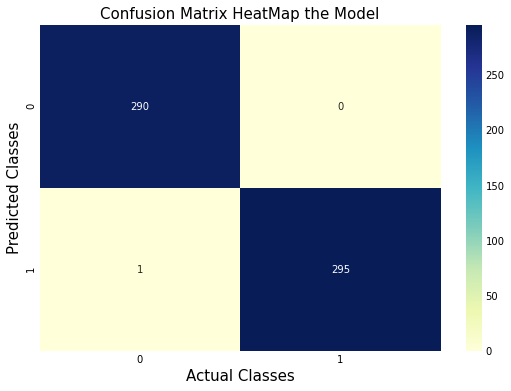

In [96]:
#visualization of confusion matrix in the form of a heatmap
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cfm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap the Model', fontsize = 15)

##### C. Pickle the selected model for future use. [2 Marks]


In [97]:
pickle.dump(cat_clf, open('cat_clf.pkl', 'wb'))

pickled_model = pickle.load(open('cat_clf.pkl', 'rb'))

In [98]:
print('Pickled Model Train Accuracy:', accuracy_score(y_train, pickled_model.predict(X_train)))
print('Pickled Model Test Accuracy:', accuracy_score(y_test, pickled_model.predict(X_test)))

Pickled Model Train Accuracy: 1.0
Pickled Model Test Accuracy: 0.9982935153583617


##### D. Write your conclusion on the results. [1 Marks]

### Conclusion

The classification goal is to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the Pass of a process (pass 'yes' i.e. -1) is 93.4% whereas those about 6.6% of the process got failed (Fail 'yes' i.e. 1).

In this cases, important performance measures such as precision, recall, and f1-score would be helpful. We can also calculate this metrics for the minority, positive, class.

* **Precision**: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
* **Recall**: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
* **f1-score**: Harmonic mean of precision and recall.

The confusion matrix for class 1 (Churn) would look like:

|                        | Predicted: 0 (Not Chrun) | Predicted: 1 (Churn)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Subscribed)**| True Negatives              | False Positives        |
|**Actual: 1 (Subscribed)**    | False Negatives             | True Positives         |

* **Precision would tell us cases where actually the process entity failed but we predicted it as passed.**
* **Recall would tell us cases where actually the process entity passed but we predicted it as failed.**

In our case, it would be accuracy that would hold more importance then other metrics. So <span class="mark">choosing accuracy as as evaluation metric. Also important would be how is model behaving over the training and test scores across the cross validation sets.</span>

**Modeling** was sub-divided in two phases, in the first phase we applied standard models (with and without the hyperparameter tuning wherever applicable) such as <span class="girk">Logistic Regression, k-Nearest Neighbor and Naive Bayes classifiers</span>. In second phase apply ensemble techniques such as <span class="girk">Decision Tree, Bagging, AdaBoost, Gradient Boosting and Random Forest classifiers</span>. Oversampling the ones with higher accuracy and better recall for subscribe.

**Oversampling**, which is one of common ways to tackle the issue of imbalanced data. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set. Out of the various methods, we chose Synthetic Minority Over-Sampling Technique (SMOTE). SMOTE’s main advantage compared to traditional random naive over-sampling is that by creating synthetic observations instead of reusing existing observations, classifier is less likely to overfit.

**Cross Validation** is a validation technique designed to evaluate and assess how the results of statistical analysis (model) will generalize to an independent dataset. Cross-Validation is primarily used in scenarios where prediction is the main aim, and the user wants to estimate how well and accurately a predictive model will perform in real-world situations.
Some of Cross Validation techniques include: K fold cross validation, Stratified K Fold Cross Validation, Leave-one-out cross validation.

**In the first phase (Standard machine learning models)**,
* Best accuracy of 99.5% was observed in SVM with hyperparameter tuning
* SVM is the best method in this case because the number of features and number of training data is very large
and also, the sparsity in the problem is very high.
* Logistic regression is the best method in cases where the dependant variable is binary. But, here SVM takes the upper hand. 
* KNN is best suitable for multiclass classification. That is if the data contains more than two lables or categories then KNN can be the suitable algorithm. In our case we only have a dependant variable "Pass/Fail" with only 2 possible values either -1 or 1.
* <span class="mark">Thus, this is the reason for SVM giving better accuracy than the other models.

**In the second phase (Ensemble models)**,
* Bagging and Catboost gives the best accuracy score for Pass/Fail class.
* Bagging and Catboost gave the best accuracy when compared with decision tree reduced max depth and gradient boosting classifier. Thus, oversampled that which gave a accuracy of 99.8% for Pass/Fail (yes) class. Best till now among ensembles.
* Tried different methods with random forest i.e. hyperparameter tuning, oversampling and even reducing max depth.
* <span class="mark">Thus two better models from this phase are Bagging and Catboost classifier when oversampled with a accuracy of 99.8%</span>
    
Catboost and Bagging are selected as the best model as it has the highest accuracy of 99.8%